# Deep Learning with PyTorch

## Appriximate Sine Function with PyTorch

เราจะเริ่ม Neural Network ตอนที่ 3 ด้วยการนำเอาโจทย์เดิม คือ การประมาณค่า sine (Sine Approximation) มาเขียนใหม่ด้วย PyTorch เพื่อทบทวนกระบวนการสร้าง Model และเพื่อให้คุ้นเคยกับคำสั่งใน Library Pytorch

จะเริ่มจาก ส่วนของ import library ตามโค้ดด้านล่าง จะเห็นว่าเราคงยังใช้ Numpy อยู่
- คำสั่ง import torch เพื่อใช้คำสั่งในการประมวลผล matrix
- คำสั่ง import torch.nn as nn เพื่อเรียกใช้ส่วนของ Neural Network
- คำสั่ง import torch.optim as optim เพื่อเรียกใช้ส่วนของ optimization

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

จากนั้นก็เป็นฟังก์ชันในการสร้างข้อมูล sine เหมือนเดิม

In [ ]:
def generate_points(start=0, end=10, step=0.1):
    x_values = np.arange(start, end + step, step)
    num_points = len(x_values)
    y_values = np.sin(x_values)
    noise = np.random.randn(num_points) * 0.1
    noisy_y_values = y_values + noise
    points = list(zip(x_values, noisy_y_values))
    return points

สร้างข้อมูลด้วย numpy และแปลงเป็น tensor ของ torch และ ตรวจสอบว่าหากมี GPU (cuda) ก็ให้นำข้อมูลขึ้นไปรันใน GPU  

In [ ]:
# Check for CUDA
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Generate the dataset
points = generate_points()

# Prepare the data
x = np.array([point[0] for point in points]).reshape(-1, 1)
y = np.array([point[1] for point in points]).reshape(-1, 1)

# Convert data to PyTorch tensors
x = torch.tensor(x, dtype=torch.float32).to(device)
y = torch.tensor(y, dtype=torch.float32).to(device)



กำหนดโครงสร้างของ Model ดังนี้
- ชั้นที่ 1 เป็น Hidden Layer ชั้นที่ 1 ประกอบด้วย Input = 1 และ Output = 16 เพื่อนำไปเข้า Hidden Layer ในชั้นถัดไป
- ชั้นที่ 2 เป็น Activation Function ของชั้นที่ 1 โดยเลือกใช้ TanH
- ชั้นที่ 3 เป็น Hidden Layer ชั้นที่ 2 ประกอบด้วย Input = 16 และ Output = 20 เพื่อนำไปเข้า Output Layer
- ชั้นที่ 4 เป็น Activation Function ของชั้นที่ 2 โดยเลือกใช้ TanH เช่นกัน
- ชั้นที่ 5 เป็น Output Layer ประกอบด้วย Input 20 และ Output 1

สังเกตว่ามิติ (Dimension) ของชั้นที่อยู่ติดกันจะต้องมิติที่เข้ากันได้


In [ ]:
# Define model using nn.Sequential
model = nn.Sequential(
    nn.Linear(1, 16),
    nn.Tanh(),
    nn.Linear(16, 20),
    nn.Tanh(),
    nn.Linear(20, 1)
).to(device)

กำหนด loss function และอัลกอรึทึมในการทำ Gradient Descent ในที่นี้จะใช้ Mean Squere Error เป็น Loss Function และ Stochastic Gradient Descent ในการหาจุดต่ำสุด

In [ ]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# Train the model
num_epochs = 20000
loss_history = []

model.train() # train mode      # It's the training time
for epoch in range(num_epochs): # for epoch in range

    outputs = model(x)          # do the forward pass
    loss = criterion(outputs, y)# calculate the loss
    optimizer.zero_grad()       # optimize a zero grad
    loss.backward()             # loss backward (do backward pass)
    optimizer.step()            # optimize step (adjust model parameter)

    loss_history.append(loss.item())


    if epoch % 1000 == 0:
        print(f"Loss after iteration {epoch}: {loss.item():.6f}")


Loss after iteration 0: 0.516136
Loss after iteration 1000: 0.346520
Loss after iteration 2000: 0.205648
Loss after iteration 3000: 0.164968
Loss after iteration 4000: 0.143679
Loss after iteration 5000: 0.129107
Loss after iteration 6000: 0.087427
Loss after iteration 7000: 0.054789
Loss after iteration 8000: 0.026545
Loss after iteration 9000: 0.016368
Loss after iteration 10000: 0.012509
Loss after iteration 11000: 0.010804
Loss after iteration 12000: 0.010035
Loss after iteration 13000: 0.009675
Loss after iteration 14000: 0.009492
Loss after iteration 15000: 0.009389
Loss after iteration 16000: 0.009321
Loss after iteration 17000: 0.009273
Loss after iteration 18000: 0.009235
Loss after iteration 19000: 0.009205


ส่วนของการ Train จะทำทั้งหมด 20,000 รอบ
- บรรทัด optimizer.zero_grad() คือการรีเซ็ทค่า gradient ให้เป็น 0 เพื่อจะได้เก็บค่า Loss ใหม่ตั้งแต่ 0 ของแต่ละ epoch
- บรรทัด outputs = model(x) เป็นสั่งให้ทำงานใน forward pass
- บรรทัด loss = criterion(outputs, y) เป็นการนำค่าผลลัพธ์จาก forward pass มาหา Loss
- บรรทัด loss.backward() เป็นการสั่งให้ทำ backward pass ซึ่งจะได้ค่า gradient ของแต่ละ neuron
- บรรทัด optimizer.step() คือ การสั่งให้ปรับ weight และ bias ของ training loop นี้

จะเห็นได้ว่า ไม่ว่าจะเป็นการเขียนโปรแกรมเป็นภาษา Python หรือ การทำงานผ่าน Library Pytorch ขั้นตอนการทำงานยังคงเหมือนเดิม และเหมือนกับรูปนี้ เพียงแต่ Pytorch ทำให้โปรแกรมสั้นลงและสะดวกขึ้น แต่การเขียนโปรแกรมยังต้องมีความเข้าใจอย่างดี

<div>
<br>
<img src="https://www.oreilly.com/api/v2/epubs/9781492045519/files/assets/dlcf_0108.png" width="600"/>

</div>
<br>

จากนั้นจะเป็นส่วนของการแสดงผล

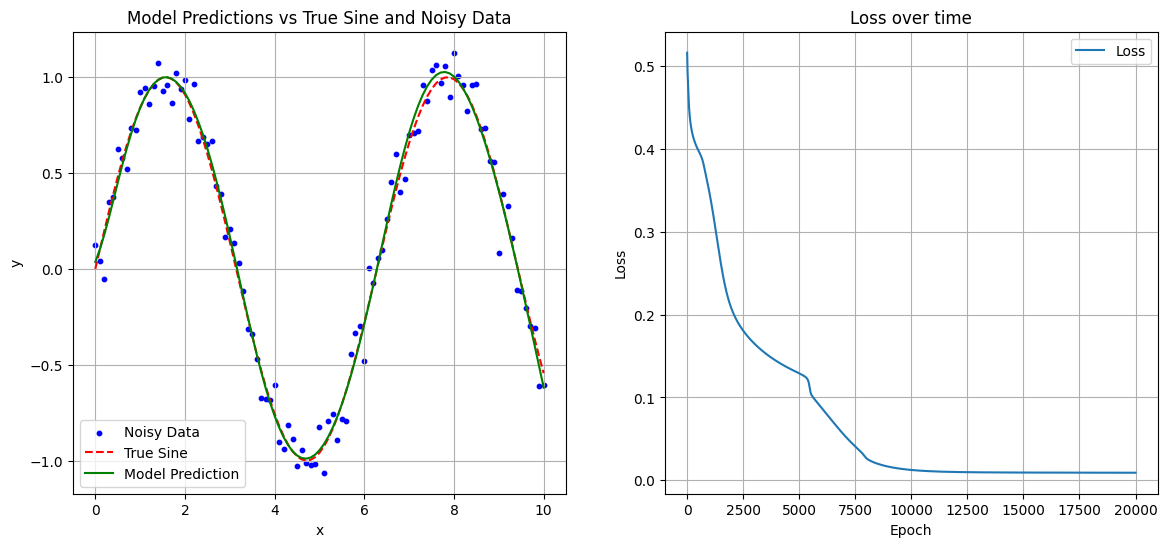

In [ ]:
def plot_output(points, model, loss, device):
    x_values, noisy_y_values = zip(*points)
    x_values = torch.tensor(x_values, dtype=torch.float32).reshape(-1, 1).to(device)
    noisy_y_values = np.array(noisy_y_values)
    y_values = np.sin(x_values.cpu().numpy()).flatten()

    model.eval()
    with torch.no_grad():
        predicted_y_values = model(x_values).cpu().numpy().flatten()

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(x_values.cpu().numpy(), noisy_y_values, label='Noisy Data', color='blue', s=10)
    plt.plot(x_values.cpu().numpy(), y_values, label='True Sine', color='red', linestyle='--')
    plt.plot(x_values.cpu().numpy(), predicted_y_values, label='Model Prediction', color='green')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Model Predictions vs True Sine and Noisy Data')
    plt.legend()  # Add this line to ensure legend is created
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Loss')  # Add label for the loss plot
    plt.title('Loss over time')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()  # Add this line to ensure legend is created
    plt.grid(True)
    plt.show()

# Plot the output
plot_output(points, model, loss_history, device)

จะเห็นได้ว่าผลลัพธ์การทำงานออกมาคล้ายเดิม

## Generative AI และ Discriminative AI

ในการใช้งาน AI ปัจจุบัน อาจแยกการใช้งานออกเป็น 2 แบบใหญ่ๆ
- แบบแรกเรียกว่า Discriminative AI หรือ ปัญญาประดิษฐ์เชิงจำแนก ซึ่งมุ่งเน้นการจำแนกหรือการทำนายผลลัพธ์จากข้อมูลที่มีอยู่ โดยเน้นการแยกแยะความแตกต่างระหว่างข้อมูลในกลุ่มหรือประเภทต่างๆ หรือตัวแปรเป้าหมายจากข้อมูลอินพุต ซึ่งสิ่งที่เราเรียนไปจะอยู่ในกลุ่มนี้
- แบบที่สองเรียกว่า Generative AI หรือ ปัญญาประดิษฐ์เชิงกำเนิด ซึ่งมุ่งเน้นในการสร้างข้อมูลใหม่ที่มีลักษณะคล้ายคลึงกับข้อมูลต้นแบบ เช่น การสร้างภาพ, ข้อความ, หรือเสียงใหม่จากการเรียนรู้จากชุดข้อมูลที่มีอยู่ ซึ่ง AI แบบหลังนี่เองที่สร้างความตื่นตัวขึ้นมาอย่างมาก เช่น Midjourney, DELL-E, ChatGPT, Gemini หรืออื่นๆ ถือว่าเป็น AI ในกลุ่มนี้



## ประเภทของปัญญาประดิษฐ์เชิงจำแนก

ใน Discriminative AI หรือ ปัญญาประดิษฐ์เชิงจำแนกนั้น ยังสามารถจำแนกประเภทได้เป็น 2 แบบ คือ
- Regression คือ AI ที่สร้างขึ้นมาเพื่อทำนายค่าของตัวแปรเป้าหมาย  จากค่าของตัวแปรที่ป้อนให้ ตัวอย่างของ AI ประเภทนี้ เช่น การประมาณค่าในสมการเส้นตรง การประมาณค่าของฟังก์ชัน Sine ที่เราทำมาแล้ว หรืออาจจะเป็นการทำนายราคาบ้านจากขนาดและทำเลที่ตั้ง หรือการทำนายผลการขายจากงบประมาณการโฆษณา หรือ การทำนายราคารถยนต์ หรืออื่นๆ ซึ่งเป้าหมายของ Regression คือการหาความสัมพันธ์และการทำนายค่าที่แม่นยำที่สุดจากข้อมูลที่มีอยู่ โดยข้อมูลที่ทำนายมักจะมีลักษณะเป็นตัวเลข
- Classification ซึ่งแปลว่าจำแนก ดังนั้นสิ่งที่ AI กลุ่มนี้ทำ คือ การจำแนกข้อมูลออกเป็นกลุ่มๆ ซึ่งเรามักเรียกว่า Class เช่น จำแนกว่าเป็นหมาหรือเป็นแมว หรือ จำแนกว่าเป็นวัตถุอะไร (เรียกว่า Object Detection) หรือ จำแนกใบหน้าคน (Face Recognition) หรือ จำแนกว่า เมล์นี้เป็น SPAM หรือไม่ หรือ เป็นโรคหรือไม่เป็นโรค หรือ จำแนกอารมณ์จากหน้า หรืออื่นๆ ที่สามารถกำหนดค่าเป้าหมายออกเป็นกลุ่มๆ ได้ ซึ่ง AI กลุ่มนี้ยังแบ่งออกเป็น ประเภทย่อย เช่น
>- Binary Classification ก็คือ การแยกออกเป็นแค่ 2 กลุ่ม (class) เช่น เป็นหมาหรือเป็นแมว เป็น SPAM หรือไม่ SPAM เป็นโรคหรือไม่เป็นโรค
>- Multiclass Classification คือ การแยกออกมากกว่า 2 กลุ่ม (class) เช่น แยกประเภทพันธ์สุนัข
>- Multilabel Classification คือ ผลลัพธ์อาจมีหลายกลุ่ม เช่น การ Tag บทความด้วยประเภท
>- ประเภทอื่นๆ ที่ไม่กล่าวในที่นี้ เพราะมีรายละะเอียดมาก และ ยังไม่จำเป็นต้องรู้ เช่น Imbalanced Classification, Ordinal Classification, Hierarchical Classification, ฯลฯ

<div>
<br>
<img src="https://cdn-images-1.medium.com/max/1600/1*xs6Jr4iAPvoqszF9JgDWOA.png" width="600"/>

</div>






### ความแตกต่างของ Classification จาก Regression

ในการเรียนที่ผ่านมา เรากล่าวถึงเฉพาะการทำงานในแบบ Regression ไม่ว่าจะเป็นการประมาณค่าสมการเส้นตรง หรือ การประมาณสมการค่า Sine แต่สำหรับวิธีการของ Classification จะมีความแตกต่างออกไปเล็กน้อย การทำงานของ Input Layer และ Hidden Layer จะเหมือนเดิม แต่สิ่งที่แตกต่างออกไป คือ Output Layer โดยแทนที่ จะมีการทำงานดังรูป (กรณี regrssion) ซึ่งจะเห็นได้ว่า ใน Output Layer จะมีเพียง Neuron เดียว เพราะต้องการข้อมูลออกมาเป็นตัวเลขเท่านั้น

<div>
<br>
<img src="https://miro.medium.com/v2/resize:fit:1400/1*Gh5PS4R_A5drl5ebd_gNrg@2x.png" width="400"/>
</div>
<br>

แต่สำหรับการทำงานแบบ Classification จะใช้ Output Layer หลาย Neuron

<div>
<br>
<img src="https://editor.analyticsvidhya.com/uploads/30541010.png" width="400"/>
</div>
<br>

อย่างไรก็ตามยังมีกรณีพิเศษ คือ กรณีของ Binary Classification เราสามารถใช้ Output Layer แบบ Neuron เดียวก็ได้ เนื่องจาก หากกำหนดให้ Output เป็น 0 หรือ 1 ก็สามารถใช้โมเดลแบบที่มี Output Layer แบบ Neuron เดียวมาทำเป็น Binary Classification ก็ได้ หรือจะใช้แบบมี Output Layer 2 Neuron ก็ได้

<div>
<br>
<img src="https://www.researchgate.net/publication/330120030/figure/fig1/AS:735637925797888@1552401157053/Deep-Neural-Network-architecture.ppm" width="400"/>
</div>
<br>

### Logistic Regression

ในกรณีที่ต้องการคำตอบแบบ 2 ค่า เช่น “เกิด” กับ “ไม่เกิด” หรือ “เสี่ยง” กับ “ไม่เสี่ยง” หรือ “เป็น” กับ “ไม่เป็น” หรือที่เรียกกันว่า Binary Classification เราจะใช้วิธีการที่เรียกว่า Logistic Regression โดยจะใช้วิธีการคำนวณแบบตัวเลขเหมือนเดิม แต่จะมีกรรมวิธีที่จะตีความตัวเลขที่ได้ ว่าอยู่ในกลุ่มไหน เช่น สมมติมีข้อมูลต่อไปนี้

| ลำดับที่  | ตัวเลขวิเคราะห์การเป็น Spam | เป็น Spam หรือไม่ | ความน่าจะเป็น (Logistic Regression)  |
| ----- | ----- | ----- | ----- |
|1	| 1.8 |	Y	| 0.8581 |
|2	| -0.8 |	N	| 0.3100 |
|3	| 2.2	| Y	| 0.9002 |
|4	| -1.7	 | N	| 0.1545 |
|5	| 0.4	| Y	| 0.5987 |

- ตัวเลขในคอลัมน์ที่ 2 เป็นผลลัพธ์ (Raw Output) ที่ได้จาก Model
- ข้อมูลในคอลัมน์ที่ 3 เป็น Label หรือคำตอบจริงว่าเป็น Spam หรือไม่เป็น

หน้าที่อย่างแรก คือ จะต้องแปลงข้อมูลที่เป็นตัวเลขในคอลัมน์ที่ 2 ให้เป็น ความน่าจะเป็นคือให้ได้ตามคอลัมน์ที่ 4 ซึ่งความน่าจะเป็นจะมีค่าอยู่ระหว่าง 0-1

ถ้ายังพอจำกันได้ ในเรื่องของ Activation Function มีฟังก์ชันหนึ่งที่ให้ Output อยู่ระหว่าง 0-1 ใช่แล้วครับ เรากำลังพูดถึง Sigmoid นั่นเอง ดังนั้นแปลว่า ถ้าเราจะนำเอาข้อมูลในคอลัมน์ที่ 2 เช่น 1.8 มาคำนวณด้วย Sigmoid ก็จะได้เป็นความน่าจะเป็น 0.85

จากนั้นก็ใช้ค่าคงที่เพื่อบอกว่าเป็น หรือ ไม่เป็นต่อไป เช่น ถ้า > 0.5 ก็เป็น Spam แต่ < 0.5 ก็ไม่เป็น Spam



### สร้าง Model Neural Network สำหรับ Logistic Classification

เอาละ! เราจะมาลองใช้ Sigmoid เพื่อทำ Binary Classification กันดู แต่ก่อนอื่น เราจะมาสร้างโมเดล Neural Network กัน โดยการสร้าง Model เราจะไม่ใช้ `nn.Sequential` ตามแบบก่อนหน้านี้ แต่จะใช้วิธีการสร้าง Subclass ของ `nn.Model` ซึ่งแสดงตามโปรแกรมด้านล่าง

ความแตกต่างของการสร้าง Model ในแบบ `nn.Sequential` กับแบบที่สร้าง Subclass ของ `nn.Model` คือ การสร้าง Model โดยใช้ `nn.Sequential` นั้นจะสั้น เหมาะกับโมเดลที่ไม่ซับซ้อน แต่ Model ที่สร้างจาก Subclass ของ `nn.Model` จะยาวกว่า แต่สามารถใส่รายละเอียดปลีกย่อยได้ ทำให้เหมาะสมกับโมเดลที่มีความซับซ้อน

เนื่องจากต่อไปเราจะใช้โมเดลที่มีความซับซ้อนมากขึ้นเรื่อยๆ ดังนั้นต่อไปเราจะใช้แบบที่สร้าง Subclass ของ `nn.Model` เป็นหลัก

In [ ]:
# Create a Logistic Regression model class

import torch
import torch.nn as nn

class LogisticRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module
    def __init__(self):
        super().__init__()
        # Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2


- ในบรรทัด `self.layer_1 = nn.Linear(in_features=2, out_features=5)` จะเป็นการสร้าง Layer ของ Neuron โดยกำหนดให้ Layer นี้มี 2 Input และมี 5 Output ซึ่งหมายความว่า Layer นี้จะมี Neuron จำนวน 5 ตัว
- ในบรรทัด `self.layer_2 = nn.Linear(in_features=5, out_features=1)` จะเป็นการสร้าง Layer ของ Neuron โดยกำหนดให้ Layer นี้มี 5 Input และมี 1 Output ซึ่งหมายความว่า Layer นี้จะมี Neuron จำนวน 1 ตัว

ซึ่งหากใช้ [tensorflow playground](https://playground.tensorflow.org) วาด ก็จะได้ Neuron Network ประมาณนี้

<div>
<br>
<img src="https://github.com/khthana/AI_resource/blob/main/TF1.JPG?raw=true" width="900"/><div>
<br>


- สำหรับใน `forward` ซึ่งมี `return self.layer_2(self.layer_1(x))` ก็คือการนำผลลัพธ์ของ Layer 1 ส่งต่อให้ Layer 2 และส่งผลกลับมาเท่านั้น

### การสุ่มและความสำคัญของ Seed

ก่อนจะไปทดสอบการทำงานของ Model ขออธิบายเรื่องการสุ่มในระบบคอมพิวเตอร์ซักเล็กน้อย

การสุ่ม (Random) ในคอมพิวเตอร์จะต่างจากการสุ่มในโลกความเป็นจริง เพราะการสุ่มในโลกความเป็นจริง เช่น โยนหัวก้อย ผลที่เกิดขึ้นจะคาดเดาไม่ได้เลย แต่การสุ่มในคอมพิวเตอร์นั้นไม่ใช่การสุ่มจริง โดยจะมีชื่อเรียกเต็มๆ ว่า pseudo random หรือแปลว่าการสุ่มเทียม เพราะคอมพิวเตอร์ไม่สามารถโยนหัวก้อยได้ จึงต้องใช้ Algorithm ในการสร้างเลขสุ่มขึ้นมา ลองดูโปรแกรมต่อไปนี้

In [ ]:
import torch

# กรณีไม่มี manual_seed
print("ไม่มี manual_seed 1:")
for i in range(3):
    print(torch.rand(3))
print("ไม่มี manual_seed 2:")
for i in range(3):
    print(torch.rand(3))
print("มี manual_seed 1:")
# กำหนด manual_seed = 12
torch.manual_seed(12)
for i in range(3):
    print(torch.rand(3))
print("มี manual_seed 2:")
torch.manual_seed(12)
for i in range(3):
    print(torch.rand(3))

ไม่มี manual_seed 1:
tensor([0.7354, 0.3592, 0.6896])
tensor([0.6495, 0.8477, 0.7411])
tensor([0.8591, 0.2289, 0.5731])
ไม่มี manual_seed 2:
tensor([0.7694, 0.2762, 0.4878])
tensor([0.4871, 0.1096, 0.4498])
tensor([0.4759, 0.3984, 0.6091])
มี manual_seed 1:
tensor([0.4657, 0.2328, 0.4527])
tensor([0.5871, 0.4086, 0.1272])
tensor([0.6373, 0.2421, 0.7312])
มี manual_seed 2:
tensor([0.4657, 0.2328, 0.4527])
tensor([0.5871, 0.4086, 0.1272])
tensor([0.6373, 0.2421, 0.7312])


จะเห็นได้ว่ากรณีที่ไม่ได้ใช้ manual seed (บางทีเรียก random seed) ค่าสุ่มที่ได้จะเปลี่ยนไปเรื่อยๆ แต่หากใช้ manual seed แล้วค่าที่ได้จะเป็นค่าชุดเดิม

**ถามว่า สำคัญอย่างไร**

เนื่องจากค่า parameter ของ Model ล้วนแต่เกิดจากการ random ทั้งสิ้น สมมติว่าเราทำงานไปรอบที่ 1 กำหนดค่า hyperparameter ต่างๆ (learning rate, epoch, จำนวน node ในแต่ละ layer แล้วพบว่าได้ผลดี แต่พอมารันในรอบที่ 2 แล้วผลเปลี่ยนไปจากเดิม เราก็คงไม่พอใจใช่มั้ยครับ ดังนั้นเพื่อให้ผลการรันยังเหมือนเดิมทุกครั้ง การกำหนด manual_seed เอาไว้ก็จะทำให้ผลการทำงานเหมือนเดิมเสมอ ทำให้ในการปรับค่า hyperparameter สามารถทำได้อย่างเป็นระบบ เหมือนกับการควบคุมสภาพแวดล้อมของการทดลอง



### ทดสอบการทำงานของ Logistic Regression

หลังจากนอกเรื่องไปพูดถึงเรื่อง manual seed คราวนี้เรากลับมาเข้าเรื่องเดิม คือ หลังจากที่กำหนด Model แล้วก็มาดูข้อมูลภายใน Model กันดูบ้าง

โปรแกรมด้านล่างนี้ เริ่มจากการกำหนด manual_seed ขึ้นมาค่าหนึ่ง
จากนั้นกำหนด Model
และนำ Model parameter เข้าไปที่ list และสั่งพิมพ์ parameter ออกมาดู จะเห็นว่ามี parameter ดังนี้
1.  ค่า weight จำนวน 10 ตัว ซึ่งเก็บอยู่ที่ hidden layer จำนวน 5 node โดยมี node ละ 2 ตัว (ตาม input)
2. ค่า bias ของ neuron ของ hidden layer จำนวน 5 ตัว
3. ค่า weight จำนวน 5 ตัว ซึ่งเก็บอยู่ที่ output layer
4. ค่า bias ของ neuron ของ output layer

และ ถ้าสังเกตให้ดีจะมีคำว่า requires_grad=True ซึ่งแปลว่า ข้อมูลที่เก็บใน tensor นี้ จะเก็บค่า gradient เอาไว้ด้วยเพื่อใช้ในการคำนวณ

In [ ]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LogisticRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188]], requires_grad=True),
 Parameter containing:
 tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], requires_grad=True),
 Parameter containing:
 tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], requires_grad=True),
 Parameter containing:
 tensor([-0.2060], requires_grad=True)]

การแสดงข้อมูลสามารถทำได้อีกวิธี คือ ใช้ `.state_dict()` ซึ่งจะมีชื่อของข้อมูลแสดงให้เห็นด้วย







In [ ]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]])),
             ('layer_1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
             ('layer_2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
             ('layer_2.bias', tensor([-0.2060]))])

คราวนี้เราจะสมมติข้อมูล เพื่อทดลองนำไปเข้า Model โดยสมมติว่ามี 5 ข้อมูลตามโปรแกรม ซึ่งตามปกติข้อมูล Input ที่เป็น Classification นอกจากจะมีข้อมูลดิบ แล้วยังต้องมีผลเฉลย หรือที่มักเรียกกันว่า Label

จากนั้นนำ data แปลงเป็น Tensor แล้วเก็บในตัวแปร X จากนั้น feed เข้าสู่ Model และเก็บไว้ที่ตัวแปร untrain_preds



In [ ]:
data= [[0.7542, 0.2315],
        [-0.7562, 0.1533],
        [-0.8154, 0.1733],
        [-0.3937, 0.6929],
        [0.4422, -0.8967]]
X = torch.tensor(data)  # Input features

label = [1., 1., 1., 1., 0.]
y = torch.tensor(label)  # Target labels

untrained_preds = model_0(X)  # Feed data to Model and output prediction

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
# Assuming y_test has the same length and format as y
print(f"Length of test samples: {len(y)}, Shape: {y.shape}")  # Use y instead of y_test
print(f"\nPredictions:\n{untrained_preds}")
print(f"\nTest labels: {y}")

Length of predictions: 5, Shape: torch.Size([5, 1])
Length of test samples: 5, Shape: torch.Size([5])

Predictions:
tensor([[-0.1029],
        [-0.1694],
        [-0.1709],
        [-0.1272],
        [-0.1728]], grad_fn=<AddmmBackward0>)

Test labels: tensor([1., 1., 1., 1., 0.])


จะเห็นว่าข้อมูลที่ทำนาย (Prediction) ออกมาจะเป็นตัวเลขที่มีขนาดไม่จำกัด
แต่ Label หรือผลทำนาย เป็นตัวเลข 1 หรือ 0 ดังนั้น จะต้องทำ 2 ขั้นตอน คือ
1. ต้องแปลง ตัวเลข ให้อยู่ในรูปแบบของความน่าจะเป็นระหว่าง 0-1 ก่อน
2. สร้างจุดตัด เช่น 0.5 เพื่อเปลี่ยนเป็น 0 กับ 1

การเปลี่ยนตัวเลขใดๆ ให้เป็นความน่าจะเป็น 0-1 โดยใช้ sigmoid

>$
\text{Sigmoid} = \log\left(\frac{p}{1 - p}\right)
$

ดังนั้นเราก็เพียงเอาตัวเลขไปผ่าน Sigmoid ก็จะได้ความน่าจะเป็นออกมา จากนั้นนำมาผ่าน round อีกชั้น ก็จะได้เป็น 1 หรือ 0

In [ ]:
# View the outputs of the forward pass on the test data
y_logits = model_0(X)
print(f"Logit : \n{y_logits}\n")

# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
print(f"Probability of prediction : \n{y_pred_probs}\n")

print(f"Prediction : \n{torch.round(y_pred_probs)}")

Logit : 
tensor([[-0.1029],
        [-0.1694],
        [-0.1709],
        [-0.1272],
        [-0.1728]], grad_fn=<AddmmBackward0>)

Probability of prediction : 
tensor([[0.4743],
        [0.4577],
        [0.4574],
        [0.4683],
        [0.4569]], grad_fn=<SigmoidBackward0>)

Prediction : 
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<RoundBackward0>)


### Multiclass Classification

คือกระบวนการจำแนกประเภทของข้อมูลออกเป็นหลายคลาส (มากกว่า 2 คลาส) โดยที่แต่ละตัวอย่างข้อมูลจะถูกจัดให้อยู่ในคลาสใดคลาสหนึ่งจากหลายคลาสที่มีอยู่ โดยอาจใช้งานได้หลากหลาย เช่น

1. การจำแนกประเภทของดอกไม้: เช่น การจำแนกดอกไม้เป็นสายพันธุ์ต่างๆ เช่น Setosa, Versicolor, Virginica
2. การรู้จำภาพ: เช่น การจำแนกภาพเป็นประเภทต่างๆ เช่น แมว, สุนัข, รถยนต์, ต้นไม้
3. การวิเคราะห์ข้อความ: เช่น การจำแนกประเภทของอีเมลเป็นหมวดหมู่ต่างๆ เช่น งาน, ส่วนตัว, สแปม

การทำงานใน Multiclass Classification จะมีขั้นตอนเพิ่มมากกว่า Binary Classification หลายอย่าง ได้แก่

1. การเตรียมข้อมูล Input หรือ การแปลงข้อมูล Input เนื่องจากในกระบวนการทำงานทุกอย่างจะต้องเป็นตัวเลขเสมอ ดังนั้น สมมติว่าจะสร้าง AI ที่แยะแยะระหว่าง กระเพรา โหระพา และ แมงลัก ก็จะต้องมีการทำ Label Encoding หรือ แปลงคลาสต่างๆ ให้เป็นค่าตัวเลข เช่น กระเพรา = 0, โหระพา = 1, แมงลัก = 2 นอกจากนั้นยังจะต้องแปลงข้อมูลให้อยู่ในรูปของ One-Hot Encoding (เวกเตอร์ที่มี 1 เพียงที่เดียว) โดย แปลงคลาสต่างๆ ให้เป็นเวกเตอร์ เช่น [1, 0, 0] สำหรับ กระเพรา, [0, 1, 0] สำหรับ โหระพา, [0, 0, 1] สำหรับ แมงลัก

ซึ่งในตอนที่ยกตัวอย่างการทำงาน ก็จะเห็นวิธีการได้ชัดเจน

2. ส่วนของ Output Layer จะต้องเปลี่ยนการคำนวณ Logistic Regression แบบหลายคลาส (Multinomial Logistic Regression) จากเดิมที่ใช้ Sigmoid ไปใช้ฟังก์ชันแบบใหม่ที่เรียกว่า Softmax

### Softmax

Softmax อาจถือได้ว่าเป็น Actication Function ตัวหนึ่ง โดยมีบทบาทคล้ายกับ Sigmoid แต่ในขณะที่ Sigmoid (ที่ผ่าน round อีกรอบ) มีผลทำให้เกิดตัวเลขเพียง 0 และ 1 เพื่อใช้ในการทำนาย Binary Classification แต่ Softmax จะให้ผลลัพธ์เป็นตัวเลขความน่าจะเป็นที่จะตรงกับข้อมูลแต่ละกลุ่ม การทำงานของ Softmax แสดงดังรูป

<div>

<img src="https://images.contentstack.io/v3/assets/bltac01ee6daa3a1e14/blte5e1674e3883fab3/65ef8ba4039fdd4df8335b7c/img_blog_image1_inline_(2).png?width=2240&disable=upscale&auto=webp" width="400"/><div>
<br>

จะเห็นว่าหลักของการทำงาน คือ ต้องแปลงค่าใน Output Layer ซึ่งออกมาเป็นตัวเลขให้เป็นความน่าจะเป็นที่ Input จะอยู่ในกลุ่มต่างๆ
- อาจจะใช้วิธีนำตัวเลขของแต่ละตัวมาบวกกัน แล้วใช้เป็นตัวหารของตัวเลขแต่ละตัวก็ได้ แต่จะมีปัญหาข้อมูลบวกลบที่อาจจะหักล้างกันเอง
- จึงใช้ยกกำลังเพื่อป้องกันค่าติดลบ คราวนี้พอพิจารณาเรื่องยกกำลัง เขาก็เลือก $e^x$ โดยมีเหตุผล คือ ยกกำลังเพราะหาอนุพันธ์ง่ายและค่าไม่ติดลบ
- ดังนั้นก็เริ่มจากนำทุกค่ามาทำ $e^x$ เช่น $e^{z1}+e^{z2}+e^{z3}+e^{z4}+e^{z5}$
- จากนั้นนำมารวมกัน (Sum) และ นำมาเป็นตัวหาร
- ตย. $e^{1.3} / (e^{1.3}+e^{5.1}+e^{2.2}+e^{0.7}+e^{1.1})$ จะได้เป็น 0.02

วิธีการแบบนี้เรียกว่า Softmax ซึ่งสังเกตุว่า ผลลัพธ์ของทุกตัวรวมกันจะเท่ากับ 1.0


### Cross Entropy Loss

สรุปว่า Activation Function ของ Output Layer กำหนดให้เป็น Softmax เพื่อแสดงความน่าจะเป็นที่ Input นั้นจะเป็น output ตัวไหนมากที่สุด

คราวนี้จะพิจารณาหาค่า Loss จาก Softmax ซึ่งจะใช้หลักการที่เรียกว่า Cross Entropy Loss

- Entropy เป็นการวัดความไม่แน่นอน (uncertainty) หรือความสุ่ม (randomness) ของการแจกแจงความน่าจะเป็น ดังนั้น Cross Entropy Loss จึงแปลว่าการวัดค่า Loss ของความน่าจะเป็นเมื่อเทียบกับความน่าจะเป็นทั้งหมด

>$ \text{Cross Entropy Loss} = - \sum_{i} y_i \log(p_i) $

โดยที่:
- $ y_i $ คือค่าจริงของตัวอย่างที่ $i$ (one-hot encoded)
- $ p_i $ คือค่าความน่าจะเป็นที่โมเดลคาดการณ์สำหรับคลาสที่ $i$

ลองมาดูการใช้งานสมมติว่า
- ข้อมูล $y_i$ คือ $[0,1,0,0,0]$ (one-hot encoded)
- ความน่าจะเป็น $p_i$ คือ $[0.02, 0.90, 0.05, 0.01, 0.02]$

>$Cross Entropy Loss = $
$−[0⋅log(0.02)+1⋅log(0.90)+0⋅log(0.05)+0⋅log(0.01)+0⋅log(0.02)] $

>$= −log(0.90) $

>$= 0.105360516 $

นี่เป็นกรณีที่ผลลัพธ์กับเป้าหมายตรงกัน

แต่หากเป็นกรณีที่ผลลัพธ์กับเป้าหมายไม่ตรงกัน เช่น สมมติว่า $y_i$ คือ $[1,0,0,0,0]$

>$Cross Entropy Loss= $

>$−[1⋅log(0.02)+0⋅log(0.90)+0⋅log(0.05)+0⋅log(0.01)+0⋅log(0.02)] $

>$=−log(0.02) $

>$= 3.912023005428146$

ซึ่งจะเห็นได้ชัดเจนว่ากรณีผลลัพธ์ตรงกับเป้าหมายจะให้ค่า Loss ที่ต่ำ และหากผลลัพธ์ไม่ตรงกับเป้าหมาย จะให้ค่า Loss ที่สูง




# การ Classification ข้อมูลตัวเลขไทย

หลังจากที่ได้อธิบาย Loss Function ที่ใช้กับ Multiple Classification กันไปแล้ว ต่อไปเราจะมาทำงานกับข้อมูลจริง โดยข้อมูลนี้เป็นข้อมูลจาก [https://github.com/kittinan/thai-handwriting-number](https://github.com/kittinan/thai-handwriting-number) แต่นำมา clean ข้อมูลบางส่วนอีกที โดยมีตัวอย่างข้อมูลดังนี้

<div>

<img src="https://raw.githubusercontent.com/kittinan/thai-handwriting-number/master/docs/img/thai-handwriting-number.png" width="800"/><div>
<br>

เราจะนำข้อมูลมาทำการ Classification ว่าเป็นเลขใดใน 0-9 ดังนั้นโจทย์นี้จะมี คลาสคำตอบอยู่ทั้งหมด 10 คลาส

ในการนำข้อมูลเข้ามา เราจะใช้คำสั่ง git clone ตามโปรแกรมด้านล่าง เพื่อ copy ข้อมูลจาก repository มายัง google colab ของเรา

**ข้อควรระวัง**
ข้อมูลใน google colab จะอยู่เฉพาะตอนที่รัน เมื่อออกจากการทำงานข้อมูลจะถูกลบทัังหมด ดังนั้นต้องทำใหม่ทุกครั้ง

In [ ]:
!git clone https://github.com/NextGen-AI-Camp/curriculum/

fatal: destination path 'curriculum' already exists and is not an empty directory.


เนื่องจากข้อมูลจะเป็นแบบ compress ดังนั้นจะต้องแตกไฟล์โดยใช้คำสั่งข้างล่างนี้

In [ ]:
# !unzip /content/curriculum/Dataset/thai-handwritten-dataset.zip -d /content/curriculum/Dataset/
!unzip /content/curriculum/Dataset/thai-handwritten-dataset/thai-handwritten-dataset.zip -d /content/curriculum/Dataset/

Archive:  /content/curriculum/Dataset/thai-handwritten-dataset/thai-handwritten-dataset.zip
   creating: /content/curriculum/Dataset/thai-handwritten-dataset/0/
  inflating: /content/curriculum/Dataset/thai-handwritten-dataset/0/0098326c-aa9e-410d-b949-e13d3cd74cfd.png  
  inflating: /content/curriculum/Dataset/thai-handwritten-dataset/0/02415aec-d4a3-4762-a1e5-bf4fe584aa66.png  
  inflating: /content/curriculum/Dataset/thai-handwritten-dataset/0/051d7c9a-2b54-4e73-9d0b-3fa75dcf1539.png  
  inflating: /content/curriculum/Dataset/thai-handwritten-dataset/0/05587e2a-e6f1-4191-8246-61e3f1cf59e9.png  
  inflating: /content/curriculum/Dataset/thai-handwritten-dataset/0/09165777-8ac1-4638-bf06-741896c7e1b9.png  
  inflating: /content/curriculum/Dataset/thai-handwritten-dataset/0/0a51150d-0afd-455e-9782-9141b68475ed.png  
  inflating: /content/curriculum/Dataset/thai-handwritten-dataset/0/0a8e39b3-4d7c-4050-a25d-746a6b8de686.png  
  inflating: /content/curriculum/Dataset/thai-handwritten-data

หลังจากที่นำไฟล์เข้ามาแล้ว เมื่อคลิกที่เครื่องหมาย Files ที่ด้านซ้ายของ google colab จะพบว่ามีไฟล์ปรากฏขึ้นมา และ หากคลิกเข้าไปในกล่องเลข 1 จะพบว่ามีไฟล์จำนวนมาก

<div>
<br>
<img src="https://github.com/khthana/AI_resource/blob/main/number_folder.JPG?raw=true" width="300"/><div>
<br>

## การโหลดข้อมูล

### Library สำหรับจัดการไฟล์

ก่อนอื่นต้องขออธิบายการใช้งาน Library สำหรับจัดการไฟล์ก่อน เพราะใช้อยู่หลายตัวเหมือนกัน




#### Library os

os เป็น Library ครอบจักรวาล คือ ใช้สำหรับให้ python สามารถใช้บริการของระบบปฏิบัติการได้ สำหรับโปรแกรมของเราจะใช้เฉพาะ Module ย่อยของ os คือใช้เฉพาะที่เกี่ยวกับ path จะใช้ในการสร้าง path ก็คือเอา string ที่เป็นลำดับของ folder มาต่อกันแล้วใส่เครื่องหมาย "/" คั่น

In [ ]:
import os

directory = "curriculum/Dataset"
path = os.path.join(directory, "thai-handwritten-dataset", "*", "*")
print(path)

curriculum/Dataset/thai-handwritten-dataset/*/*


#### Library "glob"

glob เป็น library สำหรับค้นหาชื่อไฟล์ โดยมีความสามารถในการค้นหาชื่อไฟล์ที่เก่งมาก เนื่องจากสามารถใช้ เครื่องหมาย * (หมายถึงทุกตัวอักษรทุกความยาว) และ ? หมายถึง ทุกตัวอักษรยาว 1 ตัว ในการค้นหาชื่อไฟล์ได้

จากโปรแกรมข้างล่างนี้จะเห็นว่า glob จะทำหน้าที่ค้นหาไฟล์ที่อยู่ใน folder thai-handwritten-dataset ในทุกไฟล์หรือโฟลเดอร์ และค้นหาไฟล์หรือโฟลเดอร์ในชั้นย่อยลงไปอีกชั้น โดยข้อมูลที่ค้นหาได้จะเก็บใน List ซึ่งจะเห็นว่ามีไฟล์ทั้งหมด 1750 ไฟล์

```
การทำงานเทียบเท่า dir thai-handwritten-dataset\*\* /s
```

In [ ]:
import os
from glob import glob

directory = "curriculum/Dataset/"
path = os.path.join(directory, "thai-handwritten-dataset", "*", "*")
all_file = glob(path)
print(len(all_file))
all_file[:3]

1750


['curriculum/Dataset/thai-handwritten-dataset/0/44_de8f50ce-68ee-4867-9c65-8ac7e977179d.png',
 'curriculum/Dataset/thai-handwritten-dataset/0/f99428f4-21d4-4e7c-97c5-8d6b69b2451a.png',
 'curriculum/Dataset/thai-handwritten-dataset/0/35_12be8d35-b827-4514-8b54-eeea9c48b491.png']

#### Library PIL

PIL ย่อมาจาก Python Imaging Library ทำหน้าที่ในการจัดการกับข้อมูลประเภท Image บางทีก็เรียกว่า PILLOW สามารถการปรับแต่งพิกเซล, การกรองภาพ, การปรับปรุงภาพ, เพิ่มข้อความในรูปภาพ, ฟังก์ชันการประมวลผลภาพพื้นฐาน

ดังนั้นจึงสามารถนำภาพที่อยู่ในไฟล์มาแสดงได้



Searching for files with pattern: curriculum/Dataset/thai-handwritten-dataset/*/*
(300, 300)


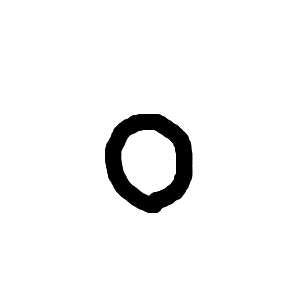

In [ ]:
import os
from glob import glob
from PIL import Image

directory = "curriculum/Dataset/"
path = os.path.join(directory, "thai-handwritten-dataset", "*", "*")
print("Searching for files with pattern:", path)
all_file = glob(path)

idx = 100 #100
image = Image.open(all_file[idx])
print(image.size)
image

## การแบ่งข้อมูลใน Dataset เป็น Training Set และ Test Set

เมื่อเรามีข้อมูลเรียบร้อยแล้ว ก่อนที่เราจะนำข้อมูลเข้าสู่ Model เราจะต้องแบ่งข้อมูลออกเป็น 2 หรือ 3 ส่วนเสียก่อน ให้ลองนึกภาพว่าคุณเป็นนักแข่งจักรยานผาดโผน และคุณมีสนามสำหรับฝึกซ้อมอยู่ 1 สนาม คุณก็ฝึกหัดกับสนามของคุณจนคล่องแคล่ว คำถามมีอยู่ว่า คุณจะพร้อมสำหรับการแข่งขันหรือไม่ คำตอบที่ควรจะเป็น คือ ยังไม่พร้อม เพราะมีประสบการณ์กับสนามของตัวเองเท่านั้น ยังไม่เคยไปขี่ในสนามอื่นเลย เราเก่งในสนามของตัวเอง ส่วนหนึ่งอาจเป็นเพราะทักษะการขี่ แต่ส่วนหนึ่งเป็นเพราะเราจำได้ว่าสนามเป็นแบบไหน พอถึงจุดไหนต้องทำอย่างไร แต่เมื่อไปเจอสนามที่ไม่เคยขี่มาก่อน เราจะเหลือแค่ทักษะการขี่เท่านั้น พูดง่ายๆ คือ ขาดความหลากหลายของประสบการณ์
<br>

การฝึกสอน Model ก็เช่นเดียวกัน ถ้าเราเอาข้อมูลไปสอนก่อน จากนั้นเอาข้อมูลชุดเดิมไปทดสอบ Model ก็จะเก่งตามข้อมูลที่สอนและจำข้อมูลที่สอนได้ ในที่สุดก็อาจจะทำได้ดีมาก ถ้าเป็นข้อสอบก็อาจจะบอกว่าตอบถูกหมด แต่เมื่อไปเจอข้อมูลที่ไม่คุ้นเคย คราวนี้ก็จะทำได้ไม่ดี เราคงไม่ต้องการ Model ที่เป็นประเภท สิงห์สนามซ้อม แต่อ่อนสนามจริง ใช่มั้ย
<br>

ดังนั้นเมื่อจะ Train หรือฝึกสอน Model ก็จะมีการแบ่งข้อมูลออกเป็น 2 หรือ 3 ส่วน ประกอบด้วย
- ข้อมูลสำหรับฝึกสอน (Training Set) ถ้าเปรียบเทียบกับการเรียนก็คือ งานที่ให้ในห้องเรียนหรือการบ้าน ข้อมูลส่วนนี้จะมีจำนวนมากที่สุด เพื่อฝึกให้มีความชำนาญหรือเก่ง โดยทั่วไปจะประมาณ 60-80% ของข้อมูล dataset ทั้งหมด
- ข้อมูลสำหรับตรวจสอบความถูกต้อง (Validation Set) ถ้าเปรียบเทียบกับการเรียนก็คือ การ Quiz คือการทดสอบว่า Model เก่งแค่ไหนในขณะที่ทำการฝึกสอน ควรจะหยุดการฝึกสอนหรือยัง หรือ เปลี่ยนแปลงค่าการฝึกสอน โดยทั่วไปจะแบ่งข้อมูลประเภทนี้ไว้ระหว่าง 10-20% โดยข้อมูลนี้จะถูกนำมาทดสอบหลังจากการฝึกสอนในแต่ละ epoch
- ข้อมูลสำหรับทดสอบจริง (Testing Set) ถ้าเปรียบเทียบกับการเรียน ก็คือ การสอบ Midterm หรือ Final Exam โดยการสอบนี้จะเป็นการทดสอบจริงว่าเมื่อนำ Model ไปใช้กับข้อมูลที่มันไม่เคยเห็นมาก่อน จะทำงานได้ดีหรือไม่ โดยทั่วไปจะแบ่งข้อมูลประเภทนี้ไว้ระหว่าง 10-20%

ในการทำงาน อย่างน้อยจะต้องมี Training Set และ Testing Set เสมอจะขาดไม่ได้เลย แต่สำหรับ Validation Set ก็ขึ้นกับผู้พัฒนา Model ว่าจะใช้หรือไม่

อาจมีข้อสงสัยว่า Validation Set กับ Testing Set ต่างกันอย่างไร ก็ขอตอบว่าทั้ง 2 ข้อมูลใช้ในการทดสอบเหมือนกัน แต่ Testing Set จะไม่นำข้อมูลไปใช้ในระหว่างขั้นตอนการ Train เลย พูดง่ายๆ คือ ต้องเป็นข้อมูลที่ไม่เคยเห็นมาก่อน (เหมือนสอบ Final) และจะทดสอบเพียงครั้งเดียว แต่ Validation Set จะนำมาทดสอบในทุกครั้งของรอบการฝึกสอน (Epoch) โดยไม่นำข้อมูลใน Validation Set ไปฝึกสอนด้วย แต่จะใช้ทดสอบว่าเรียนรู้ได้ดีหรือยัง ถ้าเรียนรู้ได้ดีผลงานใน Validation Set ก็จะดีไปด้วย

เรื่องของข้อมูลทั้ง 3 ประเภทนี้ จะเห็นภาพชัดเจนขึ้นเมื่อเราเห็นภาพของการฝึกสอน



| Split | Purpose | Amount of total data | How often is it used? |
| ----- | ----- | ----- | ----- |
| **Training set** | The model learns from this data (like the course materials you study during the semester). | ~60-80% | Always |
| **Validation set** | The model gets tuned on this data (like the practice exam you take before the final exam). | ~10-20% | Often but not always |
| **Testing set** | The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester). | ~10-20% | Always |



### ขั้นตอนการแบ่งข้อมูล

ในส่วนนี้จะมี Library ที่เรียกใช้เพิ่มอีกหลายตัว
- Pathlib จะมาช่วยในการจัดการไฟล์
- tqdm ใช้ในการแสดงความก้าวหน้าในการ copy ไฟล์ เพื่อไม่ให้ดูเงียบๆ
- shutil ใช้ในการ copy ไฟล์

การแบ่งข้อมูลสำหรับโปรแกรมนี้ จะแบ่งออกเป็น 2 ส่วน คือ traning data กับ test data เท่านั้น

In [ ]:
from pathlib import Path
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
import shutil

train_paths, test_paths = train_test_split(all_file, test_size=0.1, random_state=42)

for i in range(10):
    os.makedirs(f"data/train/{i}", exist_ok=True)
    os.makedirs(f"data/test/{i}", exist_ok=True)

def copy_to_destination(src_paths, dst_path: str = "data/train/"):
    for path in tqdm(src_paths):
        path = Path(path)
        if path.parent.name == "10":
            parent_dir = "0"
        else:
            parent_dir = path.parent.name
        shutil.copy(path, os.path.join(dst_path, parent_dir, path.name))

copy_to_destination(train_paths, "data/train/")
copy_to_destination(test_paths, "data/test/")


  0%|          | 0/1575 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

### ลดขนาดข้อมูล

เอาละ! มาถึงตรงนี้ เราก็มีข้อมูลพร้อมแล้ว โดยแบ่งเป็น training data จำนวน 1575 ข้อมูล และ test data จำนวน 175 ข้อมูล

แต่ถ้ายังจำได้จะเห็นว่ารูปต้นฉบับมีขนาด 300x300 ซึ่งรูปที่มีขนาดใหญ่ จะทำให้การประมวลผลข้อมูลนาน ดังนั้นในกรณีนี้ เราควรจะลดขนาดภาพลง เพื่อให้การประมวลผลเร็วขึ้น แต่การลดขนาดภาพก็มีความเสี่ยงอยู่บ้างที่จะทำให้ผลลัพธ์แย่ลง

ในการทำงานของ Nueral Network ให้เทียบกับการเรียนรู้ของมนุษย์ หากภาพมีข้อมูลมาก การมีภาพที่มีรายละเอียด (ขนาดใหญ่) ก็ทำให้มนุษย์ทำงานได้ดีขึ้น แต่ในบางกรณี เช่น กรณีนี้เราต้องการบอกว่าภาพเป็นภาพของเลขอะไรเท่านั้น ดังนั้นแม้จะลดความละเอียดลงไปบ้าง เราก็อาจจะแยกแยะได้อยู่ดี

ดังนั้นในกรณีนี้ ถือว่ามีความคุ้มค่าในการลดขนาดภาพ เพราะประสิทธิภาพการทำงานไม่ลดลงมากนัก แต่ความเร็วลดลงได้มาก

ในการลดขนาดข้อมูลกรณีนี้จะลดเหลือแค่ 28x28 เท่านั้น โดยค่า 28x28 เป็นค่าที่ได้จากการทดลองในอดีตที่พบว่ารูปขนาดเล็กที่ 28x28 ให้ผลดีมากกว่า 24x24 หรือ 30x30

ในการลดขนาดข้อมูล เราจะใช้ library อีกตัวหนึ่งซึ่งผู้พัฒนา PyTorch ได้พัฒนาไว้ โดยมีชื่อว่า TorchVision ซึ่งทำหน้าที่เกี่ยวกับการประมวลผลภาพ โดยใน TorchVision จะมี Module หนึ่งชื่อว่า transform ซึ่งทำหน้าที่แปลงภาพ โดยการแปลงนี้จะมี 3 ขั้นตอน คือ
- แปลงจาก 300x300 เป็น 28x28
- เปลี่ยนเป็นภาพ Grayscale
- เปลี่ยนเป็น Tensors ของ Torch และเปลี่ยนจาก 0-255 เป็น 0-1

จากภาพที่แสดง จะเห็นได้ชัดเจนว่าภาพมีรายละเอียดลดลงอย่างชัดเจน แต่ก็ยังเห็นว่าเป็นเลข 1



In [ ]:
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(),
    transforms.ToTensor()
])


tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0510, 0.2588, 0.3647, 0.3490, 0.1490, 0.0078, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])


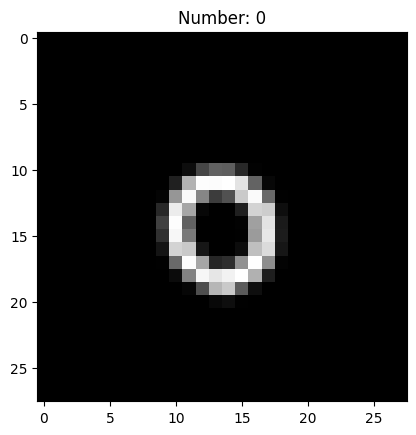

In [ ]:
im = Image.open(all_file[100])
im = (1 - transform(im)).squeeze(0)
print(im[10])
plt.title("Number: {}".format(Path(all_file[100]).parent.name))
plt.imshow(im, cmap="gray")
plt.show()

ในบรรทัด im = (1 - transform(im)).squeeze(0) มีการทำงาน 2 อย่าง คือ
- squeeze ซึ่งทำหน้าที่ลดมิติของ im ให้เหลือเพียงมิติเดียว
- 1 - transform(im) ทำหน้าที่กลับสีระหว่างดำกับขาว เพื่อให้ประมวลผลได้ง่ายขึ้น

### สร้าง class ของข้อมูล

เวลานี้เรามีข้อมูลที่แบ่งออกเป็น Training Data และ Test Data แล้วแต่ข้อมูลที่เป็นไฟล์จะยุ่งยากต่อการจัดการ ดังนั้นหลักนิยมเขามักจะสร้าง "ตัวครอบ" ขึ้นมาอีกชั้น โดยมอง ตัวครอบ ที่ว่าเป็นแหล่งข้อมูล Data Source โดยไม่สนใจว่าข้อมูลนั้นจะเก็บไว้ที่ใด ซึ่ง PyTorch ก็ได้เตรียม Library เอาไว้ สำหรับใช้ในงานนี้ โดยอยู่ในโมดูล Dataset
- ใน `__init__` จะเป็นการกำหนดข้อมูลเบื้องต้นของคลาส ได้แก่ directory หรือ folder ของไฟล์รูปภาพ และ การ transform (ถ้ามี) และสร้าง image label จากข้อมูลไฟล์
- ใน `__len__` จะทำให้สามารถใช้คำสั่ง len กับข้อมูลได้
- ใน `__getitem__` จะทำให้สามารถอ้างถึงข้อมูลในรูปแบบคล้าย List ได้ดังตัวอย่าง

In [ ]:
from torch.utils.data import Dataset, DataLoader

class ThaiHandNumData(Dataset):
    def __init__(self, image_dir: str, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_labels = [(image_dir, Path(image_dir).parent.name) for image_dir in glob(os.path.join(image_dir, "*", "*"))]

    def __len__(self):
        return len(self.image_labels)

    def __getitem__(self, idx):
        image, label = self.image_labels[idx]
        label = int(label)
        image = Image.open(image)
        if self.transform:
            image = 1 - self.transform(image)
        return image, label

จากนั้นทำการสร้าง object ข้อมูล ขึ้นมา 2 object ชื่อว่า training_data และ validation_data

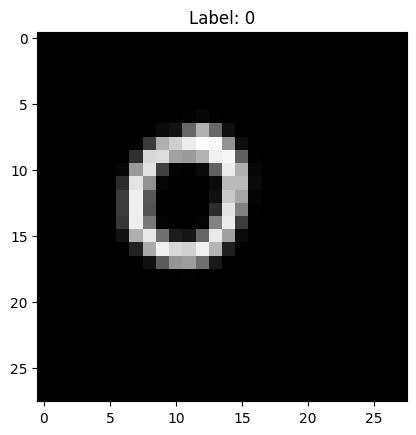

In [ ]:
training_data = ThaiHandNumData("data/train/", transform=transform)
validation_data = ThaiHandNumData("data/test/", transform=transform)

image, label = training_data[100]
plt.imshow(image.permute(1, 2, 0), cmap='gray')
plt.title(f'Label: {label}')
plt.show()

ต่อไปจะเป็นการสร้างสิ่งที่เรียกว่า batch of data เนื่องจากในการทำงานนี้เราจะใช้วิธีการที่เรียกว่า mini batch ในการปรับ weight กล่าวคือ
- จะไม่ปรับ weight กับทุกข้อมูลเนื่องจากจะทำให้ช้า
- จะไม่ปรับ weight ครั้งเดียวตอนครบทุกข้อมูลเพราะประสิทธิภาพจะไม่ดี

ดังนั้นเราจะใช้วิธีการแบ่งข้อมูลออกเป็นส่วนๆ แล้วป้อนเข้าไปใน Model เช่น ส่งไปครั้งละ 16 ข้อมูล หรือ 32 ข้อมูล จากนั้นเมื่อหาค่า Loss แล้ว จึงนำมาปรับ weight เป็นครั้งๆ ไป ซึ่งจากการทดลองพบว่า จะให้ผลดีกว่าการปรับ weight กับทุกข้อมูล หรือ ปรับ weight ครั้งเดียวตอนครบทุกข้อมูล นอกจากนั้นการส่งข้อมูลเข้าไปเป็น batch ยังทำให้ลดการใช้หน่วยความจำใน GPU อีกด้วย

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/epoch-in-machine-learning2.png" width="400"/><div>


link ด้านล่างนี้เป็น link Twitter(X) ของ Yann LeCun ปรมาจารย์คนหนึ่งในวงการ AI ซึ่งเป็นหัวหน้านักวิทยาศาสตร์เอไอที่บริษัท Meta เขาบอกว่าไม่ควรจะให้ Batch Size มากกว่า 32

[Yann LeCun : say about batch  size](https://x.com/ylecun/status/989610208497360896)

รูปด้านล่างแสดงผลของการปรับ weight ในแต่ละแบบ
- แบบ Batch Gradient Descent  การปรับค่าพารามิเตอร์จะเกิดขึ้นโดยใช้ข้อมูลทั้งหมดในหนึ่งชุดข้อมูล (batch) ต่อการอัปเดตหนึ่งครั้ง วิธีการนี้ทำให้เกิดการอัปเดตที่มีเสถียรภาพ เนื่องจากการคำนวณ gradient จะทำจากข้อมูลทั้งหมด ทำให้ค่า gradient มีค่าที่แน่นอนและไม่เปลี่ยนแปลงบ่อยครั้ง ข้อเสีย คือ เสียเวลาและทรัพยากรมาก  จึงเหมาะสำหรับปัญหาที่มีชุดข้อมูลขนาดเล็กถึงขนาดกลาง

- แบบ Stochastic Gradient Descent การปรับค่าพารามิเตอร์จะเกิดขึ้นโดยใช้ข้อมูลเพียงหนึ่งตัวอย่าง (instance) ต่อการอัปเดตหนึ่งครั้ง แทนที่จะใช้ข้อมูลทั้งหมดในชุดข้อมูล (batch) เหมือนใน Batch Gradient Descent (เลือกข้อมูลโดยการสุ่ม) ทำให้การอัปเดตพารามิเตอร์เกิดขึ้นบ่อยครั้งและมีการเปลี่ยนแปลงที่หลากหลายมากขึ้น ซึ่งสามารถช่วยหลีกเลี่ยง local minima ได้ดีขึ้นในบางกรณี

- แบบ Mini-Batch Gradient Descent คือวิธีการปรับค่าพารามิเตอร์ของโมเดลในการเรียนรู้เชิงลึกหรือการเรียนรู้ของเครื่องที่ผสมผสานข้อดีของ Batch Gradient Descent และ Stochastic Gradient Descent โดยแบ่งชุดข้อมูลทั้งหมดออกเป็นกลุ่มย่อยๆ (mini-batches) แล้วใช้แต่ละกลุ่มย่อยในการคำนวณ gradient และอัปเดตพารามิเตอร์ของโมเดล

<img src="https://statusneo.com/wp-content/uploads/2023/09/Credit-Analytics-Vidya.jpg" width="600"/><div>
<br>

ในโปรแกรมของเราจะใช้แบบ mini-batch และใช้ batch size เป็น 16



In [ ]:
torch.manual_seed(42)
train_loader = DataLoader(training_data, batch_size=16, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=16, shuffle=False)

torch.Size([16, 1, 28, 28]) torch.Size([16])


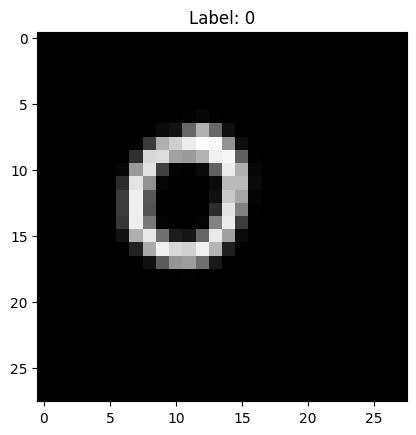

In [ ]:
# load example batch
images, labels = next(iter(train_loader))
print(images.shape, labels.shape)
plt.imshow(image.permute(1, 2, 0), cmap='gray')
plt.title(f'Label: {label}')
plt.show()

In [ ]:
# print(image[0])
images.shape, labels

(torch.Size([16, 1, 28, 28]),
 tensor([1, 4, 0, 5, 5, 8, 8, 0, 3, 9, 2, 4, 3, 1, 1, 2]))

## การสร้าง Model

ก่อนจะสร้างข้อมูลขอทบทวนขั้นตอนการ Train อีกครั้งโดยมีขั้นตอนตามตารางนี้ ดังนั้นในการ Train ให้ตรวจสอบว่าทำครบในทุกขั้นตอน

| Number | Step name | What does it do? | Code example |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | The model goes through all of the training data once, performing its `forward()` function calculations. | `model(x_train)` |
| 2 | Calculate the loss | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_train)` |
| 3 | Zero gradients | The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step. | `optimizer.zero_grad()` |
| 4 | Perform backpropagation on the loss | Computes the gradient of the loss with respect for every model parameter to be updated  (each parameter with `requires_grad=True`). This is known as **backpropagation**, hence "backwards".  | `loss.backward()` |
| 5 | Update the optimizer (**gradient descent**) | Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them. | `optimizer.step()` |
<br>

ขั้นตอนแรก คือ forward pass ซึ่ง forward pass จะสร้างใน Class ของ Model Neural Network โดยในที่นี้ตั้งชื่อว่า ThaiNumberNN ซึ่งแสดงตามโปรแกรมด้านล่าง



In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class ThaiNumberNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 80)
        self.fc2 = nn.Linear(80, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

จะเห็นว่าใน Model จะประกอบด้วย Hidden Layer จำนวน 1 Layer โดย Input มีขนาดเป็นเป็น 28x28 เนื่องจากในแต่ละรูปมีจุดภาพ 28x28 จุด โดยแต่ละจุดภาพมีขนาด 1 ไบต์ (เนื่องจากเก็บแบบ Grayscale) ดังนั้นเราจะนำข้อมูลแต่ละจุดมาเรียงกันเป็น Array 1 มิติ (ขนาด 784 ไบต์) โดยผ่านคำสั่ง view

แล้วส่งเข้าในแต่ละ Neuron ของ Hidden Layer ชั้นที่ 1 ซึ่งมีจำนวน 80 Neuron และนำมาผ่านฟังก์ชัน ReLU แล้วจึงนำเข้ามาที่ output layer ซึ่งจะมี 10 neuron ซึ่งเท่ากับจำนวน Input

In [ ]:
my_NN = ThaiNumberNN()
images, labels = next(iter(train_loader))
pred = my_NN(images)
print(images.shape, pred.shape)
print(pred[:5])
print(pred.argmax(1))
labels


torch.Size([16, 1, 28, 28]) torch.Size([16, 10])
tensor([[-0.1839, -0.1036, -0.0613,  0.0807,  0.1231, -0.0995,  0.1014, -0.0933,
         -0.0311, -0.1222],
        [-0.1329, -0.1464,  0.0186,  0.1042,  0.2160, -0.0619,  0.0687, -0.1115,
          0.0253, -0.1403],
        [-0.1165, -0.0775, -0.1156,  0.0459,  0.0428, -0.1442,  0.1579, -0.0034,
         -0.0344, -0.0677],
        [-0.1229,  0.0013, -0.0205, -0.0215,  0.0765, -0.1680,  0.0331, -0.1353,
         -0.0248, -0.1534],
        [-0.1735, -0.1040, -0.0737,  0.0089,  0.0784, -0.1244,  0.0940, -0.0664,
         -0.0292, -0.1308]], grad_fn=<SliceBackward0>)
tensor([4, 4, 6, 4, 6, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 6])


tensor([5, 7, 5, 4, 2, 6, 6, 8, 5, 9, 6, 2, 8, 6, 7, 3])

### ส่วน Train ข้อมูล และหาค่า Validation

คราวนี้ก็มาถึงการ train ข้อมูล ซึ่งหากดูจากตาราง จะพบว่าประกอบด้วยขั้นตอน 1) calculate loss 2) zero gradient 3) backpropagation และ 4) update parameter ผ่าน optimizer function

ในฟังก์ชัน train จะมีส่วนประกอบดังนี้
- training_logs ทำหน้าที่เก็บข้อมูลจำนวน 4 ข้อมูล คือ training loss ของแต่ละรอบ, training accuracy ของแต่ละรอบ, validation loss และ validation accuracy โดย loss จะเป็นผลรวมค่า loss ของทุกข้อมูล (training loss คือ ผลรวมของ training data, validation loss ผลรวมของ validation data) สำหรับ accuracy คือ ร้อยละที่ทำนายได้ถูกของแต่ละข้อมูล
- ใน Loop นอกจะทำหน้าที่รัน epoch คือ ส่งข้อมูลเข้าไป train จนครบทุกข้อมูล
- เริ่มต้นจะกำหนดให้เป็น training mode โดยใช้คำสั่ง `model.train()`
- ส่วน loop ด้านใน loop แรก `for images, labels in train_loader`  จะทำหน้าที่ค่อยๆ นำข้อมูลของ image และ label ของรูป ออกมาทีละรูป
- `pred = model(images)` นำรูปนั้นไปผ่าน forward pass ของ model
- `loss = loss_function(pred, labels)` คำนวณค่า loss เทียบกับ label โดยใช้ loss_function
- `optimizer.zero_grad()` clear ค่า gradient ที่คำนวณได้ออก เพื่อเตรียมสำหรับรันใน loop ถัดไป
- `loss.backward()` ทำ Backpropagation เพื่อคำนวณค่าที่ต้องใช้ในการปรับพารามิเตอร์
- `optimizer.step()` ทำการปรับพารามิเตอร์
- บันทึกค่า loss และ ค่าความถูกต้อง valid

จากนั้นก็เก็บค่า Loss และ Validation ของ training รอบนั้น คราวนี้ต่อไปก็จะมาทำส่วนของ Validation Test ซึ่งขั้นตอนก็จะคล้ายกับ Training เพียงแต่จะไม่มีการปรับพารามิเตอร์ จะเห็นว่าคำสั่ง `optimizer.zero_grad()`, `loss.backward()` และ `optimizer.step()` ไม่มีใน loop นี้ ซึ่งก็คือ การนำข้อมูลอีกชุดมาตรวจสอบผลการทำงานนั่นเอง

จากนั้นในทุกๆ 5 รอบก็จะพิมพ์ผลมาดูครั้งหนึ่ง (ปรับเป็นค่าอื่นก็ได้)



In [ ]:
torch.manual_seed(42)
# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create training loop function
def train(model, n_epochs, loss_function, optimizer, train_loader, test_loader):
    training_logs = {"train_loss": [],  "train_acc": [], "validate_loss": [], "validate_acc": []}
    print("-"*80)
    for epoch in range(1, n_epochs+1):
        # training
        model.train()
        train_loss, correct = 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to GPU
            pred = model(images)
            loss = loss_function(pred, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            correct += (pred.argmax(1) == labels).float().sum().item()
        # save training logs
        training_logs["train_loss"].append(train_loss/ len(train_loader))
        training_logs["train_acc"].append(correct / len(train_loader.dataset))

        # validation
        model.eval()
        test_loss, correct = 0, 0
        for images, labels in validation_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to GPU
            pred = model(images)
            test_loss += loss_function(pred, labels).item()
            correct += (pred.argmax(1) == labels).float().sum().item()
        # save validation logs
        training_logs["validate_loss"].append(test_loss/ len(validation_loader))
        training_logs["validate_acc"].append(correct / len(validation_loader.dataset))

        if epoch % 5 == 0:
          print(f"Epochs {epoch}".ljust(10),
                f"train loss {training_logs['train_loss'][-1]:.5f}",
                f"train acc {training_logs['train_acc'][-1]:.5f}",

                f"validate loss {training_logs['validate_loss'][-1]:.5f}",
                f"validate acc {training_logs['validate_acc'][-1]:.5f}",
                )
          print("-"*80)
    return model, training_logs

### ส่วน run model

คราวนี้ก็มาถึงส่วนที่ทำหน้าที่ run model โดยกำหนด
- ค่า epoch ไว้ที่ 50 รอบ
- ใช้ loss function เป็น `nn.CrossEntropyLoss()` เพราะใช้กับการทำงานแบบ Classification
- ใช้ gradient descent หรือการปรับพารามิเตอร์แบบไล่ตามความชันในแบบ SDG หรือ Stocastic Gradient Descent
- กำหนด learning rate เป็น 0.01



In [ ]:
n_epoch = 50

TN_model = ThaiNumberNN().to(device) # Initialize the model
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(TN_model.parameters(), lr=0.01)
TN_model, TN_model_history = train(TN_model, n_epoch, loss_fn, optimizer, train_loader, validation_loader)

--------------------------------------------------------------------------------
Epochs 5   train loss 2.05376 train acc 0.37968 validate loss 2.03534 validate acc 0.37143
--------------------------------------------------------------------------------
Epochs 10  train loss 1.59833 train acc 0.54794 validate loss 1.59985 validate acc 0.53714
--------------------------------------------------------------------------------
Epochs 15  train loss 1.29602 train acc 0.62540 validate loss 1.33238 validate acc 0.61714
--------------------------------------------------------------------------------
Epochs 20  train loss 1.13531 train acc 0.67937 validate loss 1.21921 validate acc 0.62857
--------------------------------------------------------------------------------
Epochs 25  train loss 1.04079 train acc 0.71048 validate loss 1.14985 validate acc 0.65143
--------------------------------------------------------------------------------
Epochs 30  train loss 0.95548 train acc 0.72444 validate lo

### ผลการทำงาน
(ในกรณีฝึกฝนจนถึงรอบที่ 100)
- จะเห็นได้ว่าเมื่อทำงานไปเรื่อยๆ จะพบว่าค่าความถูกต้องของ training accuracy จะเพิ่มขึ้นเรื่อย จนค่าสุดท้ายคือ 91 % ซึ่งถือว่าดีมากทีเดียว
- แต่เมื่อนำข้อมูลที่กันเอาไว้สำหรับตรวจสอบความถูกต้อง มาทดสอบก็พบว่าความถูกต้องจะอยู่ที่ประมาณ 60% กว่ามาตั้งแต่รอบที่ 25 และไม่ดีขึ้นเลย

In [ ]:
def plot_graph(history):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figwidth(10)
    fig.suptitle("Train vs Validation")
    ax1.plot(history["train_acc"], label="Train")
    ax1.plot(history["validate_acc"], label="Validation")
    ax1.legend()
    ax1.set_title("Accuracy")

    ax2.plot(history["train_loss"], label="Train")
    ax2.plot(history["validate_loss"], label="Validation")
    ax2.legend()
    ax2.set_title("Loss")
    fig.show()

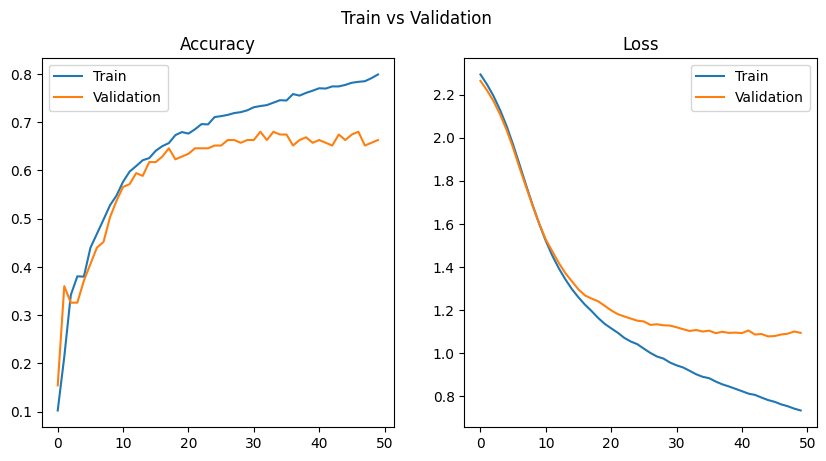

In [ ]:
plot_graph(TN_model_history)

### วิเคราะห์กราฟ

เมื่อนำข้อมูลของ Accuracy มา plot เป็นกราฟก็จะเห็นได้ชัดเจนว่าหลังจากรอบที่ 20 ความถูกต้องเมื่อเทียบกับ validation data ไม่ได้เพิ่มขึ้นเท่าไร แต่ความถูกต้องของ traning data กลับเพิ่มขึ้นเรื่อยๆ

การฉีกออกจากกันระหว่าง กราฟ traing accuracy และ validation accuracy แบบนี้แสดงให้เห็นว่าการ train ยังไม่ได้ผลที่ดีมากนัก โดยการ train ที่ได้ผลดี กราฟ trainng accuracy และ validation accuracy ควรจะอยู่ใกล้ๆ กัน ไม่แยกออกจากกันมาก
<br>

#### Overfitting
การแยกออกจากกันของ validation accuracy กับ trainng accuracy เป็นปัญหาที่เรียกว่า **overfitting** ซึ่งเป็นสถานการณ์ที่เกิดขึ้นเมื่อโมเดล machine learning ทำงานได้ดีมากกับข้อมูลการฝึก (training data) แต่ทำงานได้ไม่ดีหรือแย่มากกับข้อมูลทดสอบ (testing data) หรือข้อมูลที่ไม่เคยเห็นมาก่อน โดยลักษณะคือ Training Accuracy สูง แต่ Testing Accuracy หรือ validation Accuracy ต่ำ

> <img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*lARssDbZVTvk4S-Dk1g-eA.png" width="500">

<br>

#### เปรียบเทียบกับการทำงานของสมอง

การ overfit หากเปรียบเทียบกับการทำงานของสมอง ก็ต้องบอกว่าเป็นการใช้ความจำมากเกินไป เช่น สมมติว่าเราซ้อมจักรยานวิบาก ในสนามที่ซ้อมเป็นประจำ จนรู้ว่าตรงไหนเป็นหลุม หรือเป็นเนิน ทำให้เราสามารถหลบเนินหรือหลุมได้ ทำให้เราขับได้คล่องในสนามที่ซ้อมเป็นประจำ แต่ทำให้เราขาดทักษะในการปรับตัวกับสนามแบบทั่วไป ดังนั้นแทนที่จะพัฒนาทักษะหลบหลุม หรือ เนิน กลับไปใช้ความจำแทน

ในทาง Machine Larning อาจจะบอกว่าการเรียนรู้ไปจดจำ Noise มากเกินไป ทำให้พลาดการมองแนวโน้ม

### การนำไปใช้งาน

ทีนี้สมมติว่าเราต้องการเอาข้อมูลมาทดสอบสักหน่อย จะทำอย่างไร เราก็ต้องเขียนโปรแกรมอ่านภาพ และนำมา transform จากนั้นนำไป predict และเทียบผลกับคำตอบจริง


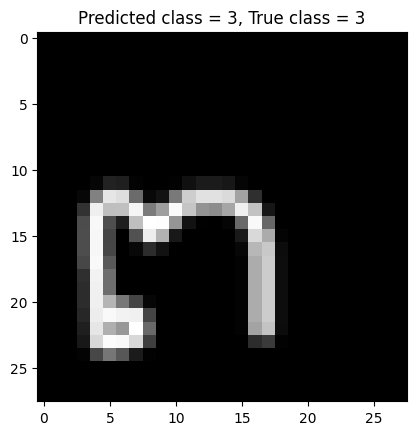

In [ ]:
# Show some random images with their predicted number
sample_path = glob("data/test/*/*.png")[99]
img = Image.open(sample_path)
img = (1 - transform(img)).squeeze(0).to(device)
TN_model.to(device)
pred = TN_model(img)
pred = int(pred.argmax(dim=1).item())
true_class = Path(sample_path).parent.name

plt.title("Predicted class = {}, True class = {}".format(pred, true_class))
plt.imshow(img.cpu(), cmap="gray")
plt.show()

## Optimization Algorithm

ใน Machine Learning มี Optimization Algorithm อยู่มากมาย เช่น หากอยากจะทราบว่าใน PyTorch มี optimization มีอะไรบ้างให้คลิก [ที่นี่](https://pytorch.org/docs/stable/optim.html#algorithms)

ต่อไปจะอธิบาย Optimization Algorithm อย่างย่อๆ จำนวน 3 ตัวได้แก่
- Stochastic Gradient Descent (SGD) optimizer
- Adam Optimizer
- SDG with Momentum



### Stochastic Gradient Descent (SGD)

- Gradient Descent (GD): เป็นวิธีการหาค่าต่ำสุดของ loss function  โดยการอัพเดตพารามิเตอร์ในทิศทางที่ทำให้ Loss มีค่าลดลงไปเรื่อยๆ ซึ่งสามารถทำได้โดยการคำนวณ gradient  ของ loss function ตามพารามิเตอร์แล้วอัพเดตพารามิเตอร์ไปในทิศทางที่ตรงข้ามกับ gradient นั้น วิธีการนี้ให้ที่ถูกต้องสูง แต่จะเสียเวลาในการทำงาน เนื่องจากจะต้องอัพเดตพารามิเตอร์จากทุกข้อมูล

- Stochastic Gradient Descent (SGD): แตกต่างจาก GD ตรงที่การคำนวณ gradient ในแต่ละครั้งจะไม่ใช้ข้อมูลทั้งหมด แต่จะใช้ข้อมูลตัวอย่างเดียวหรือชุดย่อย (mini-batch) ของข้อมูลเท่านั้น ซึ่งทำให้การคำนวณ gradient ในแต่ละครั้งเร็วขึ้น ซึ่งจะเกิดผลทำให้การปรับพารามิเตอร์มีการ swing ตามรูปที่แสดงอยู่ด้านบน

*** SDG กับ local minima ***

- เนื่องจาก gradient ของทุกพารามิเตอร์ อาจมีจุดต่ำสุดหลายที่ตามรูป โดยจุดต่ำสุดเฉพาะถิ่น จะเรียกว่า local minima และจุดต่ำสุดของทั้งหมดจะเรียกว่า global minima
- โดยในการทำงานแบบ gradient descent นั้น การสุ่มตำแหน่งแรกของการทำงานเพื่อนำมาคำนวณค่า gradient นั้นมีความสำคัญมาก เพราะหากเริ่มต้นจากจุดที่ไม่ดีแล้ว อาจทำให้ได้จุดต่ำสุดที่ไม่ใช่จุดต่ำสุดรวม
- เนื่องจาก SDG ใช้การสุ่มข้อมูลมาคำนวณค่า gradient เป็นผลทำให้เกิดการกระโดดของจุดทำงาน ซึ่งอาจบังเอิญเป็นการกระโดดข้าม local minima ก็ได้ ดังนั้น SDG จึงได้รับความนิยมมากกว่า และ ยังมีการทำงานที่เร็วกว่าอีกด้วย

> <img src="https://www.researchgate.net/publication/338621083/figure/fig4/AS:847811214069760@1579145353037/Gradient-Descent-Stuck-at-Local-Minima-18.ppm" width="300"/><div>
<br>

> <img src="https://miro.medium.com/v2/resize:fit:1400/0*HwFeAB4nHLpqgw-7.png" width="400"/><div>
<br>

*Ref : Loss landscape of a convolutional neural network with 56 layers (VGG-56) [source](https://arxiv.org/abs/1712.09913)*


### SDG with Momentum

- SGD with Momentum เป็นเทคนิคที่ปรับปรุงจาก Stochastic Gradient Descent (SGD) โดยการเพิ่ม "momentum" เพื่อเร่งการลู่เข้า (convergence) และลดการสั่น (oscillations) ของการปรับพารามิเตอร์
- โดยการปรับพารามิเตอร์ไม่เพียงแต่พิจารณาจาก gradient ของ loss function ในปัจจุบันเท่านั้น แต่ยังพิจารณาจากทิศทางของการอัพเดตก่อนหน้านี้ด้วย ซึ่งเป็นที่มีของคำว่า momentum
- ขอยกตัวอย่างเช่น สมมติว่าการปรับพารามิเตอร์ เป็นไปในทิศทางหนึ่งมาตลอด แต่อยู่ๆ ก็มีการฉีกออกจากเส้นทางเดิม เนื่องจากการสุ่มข้อมูลที่นำมาคำนวณ gredient อาจเป็นข้อมูลที่มีความต่างไปจากข้อมูลอื่นๆ มาก ก็จะนำค่า momentum มาลบออกจากค่าของการปรับ ทำให้การฉีกจากเส้นทางเดิมมีค่าลดลง

ใน PyTorch ใช้ SDG with Momentum ดังนี้
```
# optimizer SGD with Momentum
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
```





### Adam (Adaptive Moment Estimation)

ก่อนจะทำความเข้าใจกับ Adam ต้องรู้จักกับ Adagrad และ RMSProp ก่อน
- Adagrad (Adaptive Gradient Algorithm) Adagrad เป็นอัลกอริธึมการปรับค่าเรียนรู้ (learning rate) แบบปรับตัวเองได้ ที่พัฒนาขึ้นมาเพื่อจัดการกับปัญหาการลดค่าเรียนรู้ในระหว่างการฝึกโมเดล machine learning อัลกอริธึมนี้ได้รับความนิยมเพราะสามารถปรับค่าเรียนรู้ของพารามิเตอร์แต่ละตัวได้อย่างอัตโนมัติ ทำให้เหมาะสมกับข้อมูลและการอัพเดตที่แตกต่างกันในแต่ละพารามิเตอร์ Adagrad ปรับค่าเรียนรู้ของพารามิเตอร์แต่ละตัวโดยพิจารณาจากประวัติของ gradient ก่อนหน้า แนวคิดหลักคือการใช้ gradient ที่เคยคำนวณในอดีตเพื่อปรับค่าเรียนรู้ในปัจจุบัน โดยการปรับค่านี้จะทำให้พารามิเตอร์ที่มีการอัพเดตมากมีค่าเรียนรู้ที่ลดลง และพารามิเตอร์ที่มีการอัพเดตน้อยจะมีค่าเรียนรู้ที่สูงขึ้น สำหรับการทำงานโดยละเอียด จะไม่อธิบาย ผู้สนใจให้ศึกษาเพิ่มเติม
- RMSprop (Root Mean Square Propagation) RMSprop เป็นอัลกอริธึมการปรับค่าพารามิเตอร์ที่ใช้ในการฝึกโมเดล machine learning ซึ่งเป็นการพัฒนาต่อจาก Adagrad โดยปรับปรุงปัญหาที่ค่า learning rate ลดลงเร็วเกินไป RMSprop มีแนวคิดหลักคือการรักษาค่า learning rate ให้เหมาะสมตลอดการฝึกโดยใช้ค่าเฉลี่ยเคลื่อนที่ (moving average) ของกำลังสองของ gradient ซึ่งช่วยลดปัญหาที่ค่า learning rate ลดลงเร็วเกินไปใน Adagrad

รูปด้านล่างแสดงการเปรียบเทียบการทำงานระหว่าง SDG, Momentum, Adagrad, RMSprop และอื่นๆ ซึ่งจะเห็นได้ว่าในขณะที่ SDG ติดอยู่ที่ local minima แต่ตัวอื่นสามารถออกจาก local minima ได้

<img src="https://editor.analyticsvidhya.com/uploads/121381obtV.gif" width="400"/><div>
<br>

สำหรับ ADAM เป็นการนำเอาอัลกอริทึม Adagrad และ RMSprop มารวมคุณสมบัติที่ดีไว้ด้วยกัน ซึ่งไม่อธิบายการทำงานโดยละเอียดเช่นกัน

ในเรื่องของ Optimization ไม่มีอัลกอริทึมใดที่ดีที่สุด เช่น ในการประมาณค่าสมการเส้นตรงแบบที่เราทำในตอนแรก หากนำ Adam ไปใช้กลับให้ผลการทำงานที่ไม่ดี ดังนั้นต้องเลือกใช้ อัลกอริทึม  Optimization ให้เหมาะสม ซึ่งจะทดลองเองก็ได้ หรือศึกษางานของผู้อื่น

## การปรับปรุง Model (Optimization)

มาถึงจุดนี้ คงจะเห็นภาพรวมของการทำงานของ Machine Learning แล้ว ซึ่งคงยังจำกันได้ว่า Model ที่เราสร้างยังทำงานได้ไม่ดี เนื่องจากเกิด Overfitting ขึ้น




### Overfitting คืออะไร

เนื่องจาก Overfitting คือ สิ่งหนึ่งที่แสดงว่า Model ยังไม่ดี ดังนั้นเราจะมากทำความเข้าใจกันว่า Overfitting คืออะไร ก่อนหน้านี้ได้กล่าวว่า Overfitting คือ "การเรียนรู้ไปจดจำ Noise มากเกินไป ทำให้พลาดการมองแนวโน้ม"

ลองมาดูรูปนี้

<img src="https://miro.medium.com/v2/format:webp/1*SJENTprShSaT9eB-4CUyAw.gif" width="300"/><div>


จากรูปจะเห็นการเปลี่ยนไปของ weight ในระหว่างการ train จะเห็นว่าบางเส้นทางค่า weight มีค่าเพิ่มขึ้น แปลว่า model ให้ค่ากับพารามิเตอร์ หรือ ข้อมูลของเส้นทางนั้นมาก คราวนี้ลองตอบคำถาม 2 ข้อ

**คำถามข้อที่ 1 **
- ค่า Loss ต่ำสุดของ Model มีได้กี่แบบ
- คำตอบ คือ มีได้ไม่จำกัด เนื่องจากค่าพารามิเตอร์เริ่มต้นจะเป็นค่าสุ่ม และการเลือกตัวอย่างสำหรับการปรับพารามิเตอร์ก็เป็นการสุ่ม ดังนั้นเมื่อ run model ไปเรื่อยๆ ในที่สุดก็จะได้ชุดพารามิเตอร์ชุดหนึ่งที่ทำให้ค่า loss ต่ำ และ หากรันอีกครั้งก็จะได้ค่าพารามิเตอร์ที่ทำให้ค่า loss ต่ำใกล้เคียงกับกับครั้งแรก ดังนั้นสรุปได้ว่าผลจากการ run model จะมีคำตอบมากมาย แต่ได้ผลสิ่งเดียวกัน คือ ทำให้ค่า loss ต่ำ ทำให้สามารถทำนาย หรือ ประมาณค่าได้ถูกต้อง

**คำถามข้อที่ 2 **
- ระหว่าง model ที่มีผลเดียวกัน แต่มีค่าพารามิเตอร์แตกต่างกันมาก คือ ค่ามากก็มาก ค่าน้อยก็น้อย กับอีก model ที่มีพารามิเตอร์แตกต่างกันน้อยกว่า ควรเลือก model ไหนมาใช้
- คำตอบ ควรเลือกโมเดลที่ 2 หากถามว่าทำไม ก็ต้องย้อนความทรงจำกลับไปที่เรื่องการประมาณค่า sine ซึ่งจะเห็นว่าแต่ละ neuron จะ active กับแต่ละข้อมูลไม่เท่ากัน และ มีความจริงอีกประการ คือ ข้อมูลที่นำมาให้ model เรียนรู้ บางข้อมูลจะใกล้เคียงกัน แต่บางข้อมูลจะต่างไปจากข้อมูลอื่นๆ มาก (ซึ่งอาจจะเรียกว่า Noise เพราะข้อมูลโดดไปจากเพื่อน) ทีนี้หากบังเอิญว่า ในข้อมูลที่เป็น Noise มาเจอกับ Neuron ที่มีค่าพารามิเตอร์สูงๆ จะเกิดอะไรขึ้น ผลที่เกิดขึ้นก็คือจะทำให้การคำนวณค่า loss เกิดเพี้ยนได้มาก ซึ่งเป็นสิ่งที่เราไม่ต้องการ

จึงได้กล่าวว่า Overfitting คือ "การเรียนรู้ไปจดจำ Noise มากเกินไป ทำให้พลาดการมองแนวโน้ม"

เมื่อเราทราบถึงสาเหตุ ดังนั้นการแก้ไขก็คือ พยายามทำให้ model มีพารามิเตอร์ที่ "ไม่มีเส้นใหญ่" มากนัก



### วิธีในการแก้ไข Overfitting

เมื่อเราทราบสาเหตุแล้ว เราก็มาดูว่าจะมีวิธีแก้อย่างไรบ้าง

1. เพิ่มข้อมูลการฝึกให้มากขึ้น เมื่อมีข้อมูลที่หลากหลายขึ้น ข้อมูลที่เป็น Noise ก็จะมีผลกับ model ลดลง การจำรูปแบบก็จะลดลง

2. ทำ Cross validation เป็นการปรับปรุงการแบ่งข้อมูลใหม่ โดยแทนที่จะแบ่งข้อมูลเป็นชุดสอน (Training set) และ ชุดทดสอบ (Test set) ก็จะทำอีกแบบ คือชุดข้อมูลจะถูกแบ่งออกเป็นชุดย่อยๆ จำนวน k ชุด และ ในการทำงานจะทำงานทั้งหมด k รอบ โดยในแต่ละรอบ ชุดข้อมูล Test จะมีการสับเปลี่ยนกัน ทำให้เมื่อ train ครบทั้ง k รอบ ชุดข้อมูลทุกส่วนจะมีโอกาสเป็นทั้งชุดข้อมูลสอน และทดสอบ โดยอาจมองว่าเป็นการเพิ่มความหลากหลายของข้อมูลเพิ่มขึ้นวิธีหนึ่งนั่นเอง

<img src="https://user-images.githubusercontent.com/26833433/258589390-8d815058-ece8-48b9-a94e-0e1ab53ea0f6.png" width="500"/><div>

3. Data Augmentation เป็นวิธีในการเพิ่มจำนวนของชุดข้อมูลสอน (Train set) โดยการนำข้อมูลเดิมมาดัดแปลงเพื่อเพิ่มความหลากหลายของข้อมูล กรณีที่เราไม่สามารถหาข้อมูลที่มีความหลากหลายได้มากพอ วิธีการทำ Data Augmentation จะนิยมใช้กับข้อมูลที่เป็นภาพมาก เพราะสามารถเพิ่มความหลากหลายได้ง่าย เช่น เอารูปมาขยาย หรือ หมุน หรืออื่นๆ ก็จะได้ข้อมูลที่แตกต่างจากข้อมูลเดิม จากนั้นก็นำเข้าไปเป็นข้อมูลสำหรับฝึกสอน

<img src="https://ubiai.tools/wp-content/uploads/2023/11/UKwFg.jpg" width="500"/><div>

4. Early stopping เป็นวิธีการในการหยุดการ overfit โดยการหยุดการทำงานของ model เสียก่อน เช่น จากรูป เมื่อเราเห็นว่าการ overfit เริ่มเกิดขึ้น เราก็หยุดการทำงานของ model เสียก่อน

<img src="https://miro.medium.com/v2/resize:fit:567/0*z19dbRlkgocQYn6t.png" width="350"/><div>


ใน 3 วิธีแรกจะเน้นไปที่การเพิ่มข้อมูลการฝึกโดยวิธีการต่างๆ ส่วนวิธีที่ 4 คือ หยุดการฝึก แต่สำหรับวิธีที่จะกล่าวถึงต่อไป เป็นวิธีที่ใช้กระบวนการทางคณิตศาสตร์เข้ามาช่วย โดยมีเป้าหมายเพื่อที่จะ "แกล้ง" หรือ "ลดความสำคัญ" หรือ "ลงโทษ" (Penalty) กับพารามิเตอร์ที่มีค่ามากๆ

4. L1 Regularization คำว่า Regularization แปลว่า การทำให้เป็นทั่วไป หรือ การทำให้เป็นมาตรฐาน โดยนัยคือ ต้องการให้พารามิเตอร์อยู่ในกรอบที่ต้องการ หลักการของ L1 regularization คือการเพิ่มเทอมลงโทษเข้าไปใน loss function ของโมเดล โดยเทอมลงโทษนี้เป็นค่าสัมบูรณ์ของค่าสัมประสิทธิ์ ดังนี้:


>  $  \text{Loss} = \frac{1}{2m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{n} |w_j| $
<br>

จะเห็นว่าสมการแบ่งออกเป็น 2 เทอม โดยเทอมแรก ก็คือ Loss Function นั่นเอง ดังนั้น L1 regularization ก็คือการเพิ่มเทอมที่ 2 เข้าไป โดยเอาค่า w ทั้งหมดมาทำ absolute แล้วบวกกัน จากนั้นคูณด้วย $\lambda$ ซึ่งเป็น coefficient ซึ่งใช้ในการควบคุมความแรงของการลงโทษ (penalty) หาก $\lambda$ มีค่าสูง การลงโทษจะมีความแรงมาก ทำให้ค่าสัมประสิทธิ์ $w_j$ ถูกปรับให้มีค่าน้อยลงมากและบางตัวอาจเป็น 0 ได้

5. L2 Regularization จะคล้ายกับ L1 แต่เปลี่ยนเป็นยกกำลังสอง ตามสมการ ความแตกต่างจาก L1 คือ L2 จะไม่ทำให้พารามิเตอร์เป็น 0 แต่จะเป็นการเกลี่ยพารามิเตอร์ให้ใกล้กันมากขึ้น

> $ \text{Loss} = \frac{1}{2m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{n} w_j^2 $

ุ6. Dropout Regularization วิธีการนี้จะเป็นการเกลี่ยพารามิเตอร์อีกรูปแบบหนึ่ง โดยจะเป็นการสุ่มตัด Neuron บางตัวออกไปในระหว่างการเรียนรู้ของโมเดล อาจมองได้ว่าเป็นการแกล้ง model ก็ได้ โดยในแต่ละรอบการทำงาน Neuron บางตัวจะถูกกำหนดให้มีน้ำหนักเป็น 0 โดยการสุ่ม ซึ่งนิวรอลที่มีน้ำหนักเป็น 0 จะไม่ส่งผลต่อการทำงาน การทำซ้ำเช่นนี้ไปเรื่อยๆ ในกระบวนการสอน จะทำให้นิวรอลเน็ตเวิร์กพยายามไม่ขึ้นอยู่กับ (Dependent) Neuron ใด Neuron หนึ่งมากเกินไป ทำให้ส่งผลต่อการลดโอกาสการเกิด Overfitting ได้นั่นเอง วิธีการนี้เราอาจมองว่าคล้ายกับการเรียนรู้ของมนุษย์ เพราะมนุษย์จะมีการลืมบางข้อมูล ดังนั้นในรอบการเรียนรู้ก็จะทำให้โมเดลลืมบางพารามิเตอร์ไปบ้าง จะทำให้ model เรียนรู้แนวโน้ม (trend) มากขึ้น


<img src="https://www.researchgate.net/publication/309206911/figure/fig3/AS:418379505651712@1476760855735/Dropout-neural-network-model-a-is-a-standard-neural-network-b-is-the-same-network.png" width="600"/><div>







### ปรับปรุง model โดยการเพิ่ม node และ Layer

เอาละ! คราวนี้เราจะกลับมาปรับปรุง Model โดยเพิ่มจำนวน Node และ Layer เข้าไป โดยหวังว่าจะเรียนรู้ได้มากขึ้น โดยได้เพิ่มเป็น 2 Layer โดยกำหนดให้ Layer แรกมี 160 node และ Layer ที่ 2 จำนวน 80 node

โดยเขียนเป็น คลาสชื่อ ThaiNumberNN2

In [ ]:
class ThaiNumberNN2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 160)
        self.fc2 = nn.Linear(160, 80)
        self.fc3 = nn.Linear(80, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

### ทดสอบการทำงาน

เมื่อปรับโมเดลเรียบร้อย ก็ทดลอง train 50 epoch เหมือนเดิม แล้วดูว่าจะได้ผลดีขึ้นไหม







In [ ]:
n_epochs = 50

TN_model2 = ThaiNumberNN2().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(TN_model2.parameters(), lr=0.01)

TN_model2, TN_model2_history = train(
    TN_model2, n_epochs, loss_fn, optimizer, train_loader, validation_loader)

--------------------------------------------------------------------------------
Epochs 5   train loss 2.27102 train acc 0.26921 validate loss 2.26987 validate acc 0.20571
--------------------------------------------------------------------------------
Epochs 10  train loss 2.12839 train acc 0.35746 validate loss 2.11961 validate acc 0.29714
--------------------------------------------------------------------------------
Epochs 15  train loss 1.65553 train acc 0.49587 validate loss 1.64681 validate acc 0.45714
--------------------------------------------------------------------------------
Epochs 20  train loss 1.27084 train acc 0.61778 validate loss 1.30616 validate acc 0.58857
--------------------------------------------------------------------------------
Epochs 25  train loss 1.10145 train acc 0.67492 validate loss 1.21102 validate acc 0.61143
--------------------------------------------------------------------------------
Epochs 30  train loss 0.98315 train acc 0.70667 validate lo

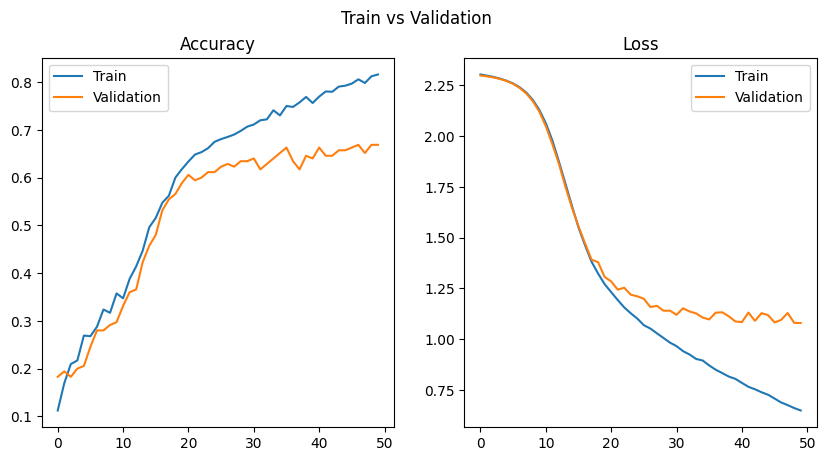

In [ ]:
plot_graph(TN_model2_history)

### วิเคราะห์กราฟ

เมื่อนำข้อมูลของ Accuracy มา plot เป็นกราฟก็จะเห็นว่าความถูกต้องของ traning data เพิ่มเป็นประมาณ 98 % เรียกได้ว่า Model เรียนรู้ได้ดีขึ้น และ Accuracy ของ validation data ก็เพิ่มขึ้นเป็น 72 % ก็ถือว่าดีขึ้น



### เพิ่ม Dropout

คราวนี้เราจะลองลด Overfitting โดยการเพิ่ม Dropout ดูว่าจะได้ผลอย่างไร

In [89]:
class DropoutThaiNumberNN3(nn.Module):
    def __init__(self):
        super().__init__()
        # self.fc1 = nn.Linear(28 * 28, 160)
        # self.fc2 = nn.Linear(160, 80)
        # self.fc3 = nn.Linear(80, 10)
        # self.dropout = nn.Dropout(0.1)
        self.fc1 = nn.Linear(28 * 28, 512)  #(28 * 28, xxx)
        self.fc2 = nn.Linear(512, 256) #(xx, xx)
        self.fc3 = nn.Linear(256, 10) #(xx, 10)
        self.dropout = nn.Dropout(0.3) #0.2-0.4

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.relu(x) #F.sigmoid(x) or F.tanh(x) or F.softmax(x) or F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = F.relu(x) #F.sigmoid(x) or F.tanh(x) or F.softmax(x) or F.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

In [90]:
n_epochs = 150
drop_model = DropoutThaiNumberNN3().to(device)  # Initialize a model
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(drop_model.parameters(), lr=0.01)

dropout_model, dropout_model_history = train(drop_model, n_epochs, loss_fn, optimizer, train_loader, validation_loader)

--------------------------------------------------------------------------------
Epochs 5   train loss 2.26353 train acc 0.20698 validate loss 2.26450 validate acc 0.18286
--------------------------------------------------------------------------------
Epochs 10  train loss 2.10375 train acc 0.32444 validate loss 2.08610 validate acc 0.29143
--------------------------------------------------------------------------------
Epochs 15  train loss 1.62516 train acc 0.47492 validate loss 1.58260 validate acc 0.49714
--------------------------------------------------------------------------------
Epochs 20  train loss 1.31706 train acc 0.57651 validate loss 1.31473 validate acc 0.58286
--------------------------------------------------------------------------------
Epochs 25  train loss 1.15488 train acc 0.64889 validate loss 1.20912 validate acc 0.61714
--------------------------------------------------------------------------------
Epochs 30  train loss 1.04150 train acc 0.66413 validate lo

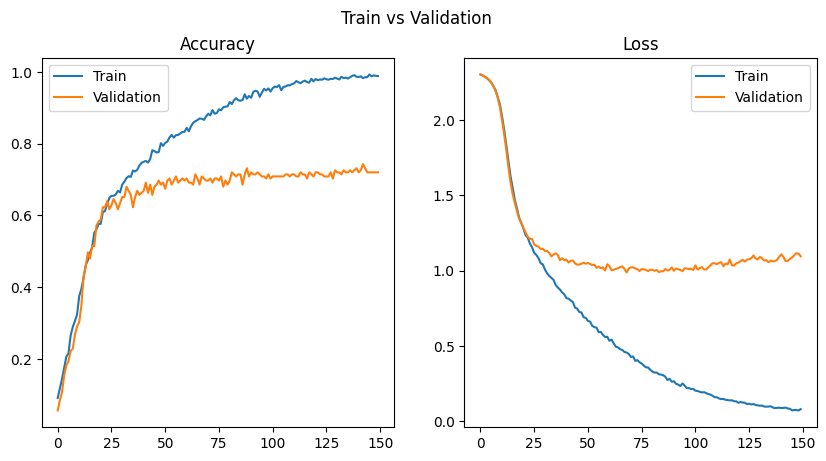

In [97]:
plot_graph(dropout_model_history)

### Image Augmentation

เราจะปรับปรุงต่อโดยใช้เทคนิคเพิ่มความหลากหลายโดยใช้ Image Augmentation โดยใช้คำสั่ง RandomAffine ใน Pytorch โดยคำสั่งนี้จะสั่งให้ random โดยทำ operation ของ TorchVision มาใช้ ได้แก่ degrees คือ การหมุนภาพระหว่าง -10 ถึง 10 องศา translate คือ การเลื่อนซ้ายขวาบนล่าง ก็ใช้ประมาณ 10 % แต่ scale คือ การขยายภาพ จะไม่ใช้ จึงให้ค่าเป็นเท่าเดิม


In [99]:
train_transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(),
    # add RandomAffine
    transforms.RandomAffine(degrees=(-10, 10), translate=(0.0, 0.1), scale=(1, 1)),
    transforms.ToTensor(),
])

val_transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(),
    transforms.ToTensor(),
])

คราวนี้มาลองดูภาพที่สร้างขึ้นจาก transform โดยมีการทำ Data Augmentation จะเห็นได้ว่าเปลี่ยนไปจากเดิม

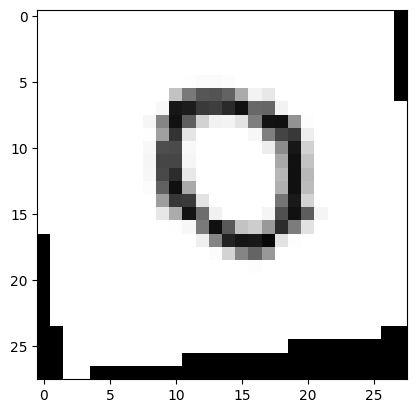

In [100]:
path = glob("curriculum/Dataset/thai-handwritten-dataset/*/*")[30]
img = Image.open(path)

transformed_img = train_transform(img).squeeze(0)

plt.imshow(transformed_img, cmap="gray")
plt.show()

พอเราสร้างชุดข้อมูลใหม่ ก็จะต้องมาสร้าง dataset ชุดใหม่ด้วย

In [101]:
train_thaidigit_dataset = ThaiHandNumData("data/train/", transform=train_transform)
validation_thaidigit_dataset = ThaiHandNumData("data/test/", transform=val_transform)

In [102]:
train_dataloader = DataLoader(train_thaidigit_dataset, batch_size=16, shuffle=True)
validation_dataloader = DataLoader(validation_thaidigit_dataset, batch_size=16, shuffle=False)

คราวนี้ก็ลงมือ train เนื่องจากเราทำ Data Augmentation ก็เปรียบเสมือนกับมีข้อมูลเพิ่มขึ้น ดังนั้นจะเพิ่ม epoch เป็น 50 รอบ

In [103]:
    # Let's train the model with augmented data
    n_epochs = 150
    augmented_model = DropoutThaiNumberNN3().to(device)  # Initialize the model
    loss_fn = nn.CrossEntropyLoss()
    # optimizer = torch.optim.SGD(augmented_model.parameters(), lr=0.01)
    optimizer = torch.optim.Adam(augmented_model.parameters(), lr=0.01)

    augmented_model, augmented_model_history = train(
        augmented_model, n_epochs, loss_fn, optimizer, train_dataloader, validation_dataloader
    )

--------------------------------------------------------------------------------
Epochs 5   train loss 1.84037 train acc 0.36000 validate loss 1.55984 validate acc 0.49714
--------------------------------------------------------------------------------
Epochs 10  train loss 1.70976 train acc 0.40889 validate loss 1.39876 validate acc 0.52571
--------------------------------------------------------------------------------
Epochs 15  train loss 1.63335 train acc 0.42413 validate loss 1.41515 validate acc 0.54857
--------------------------------------------------------------------------------
Epochs 20  train loss 1.59895 train acc 0.44190 validate loss 1.39232 validate acc 0.54286
--------------------------------------------------------------------------------
Epochs 25  train loss 1.64170 train acc 0.42413 validate loss 1.38212 validate acc 0.52571
--------------------------------------------------------------------------------
Epochs 30  train loss 1.61484 train acc 0.44190 validate lo

In [104]:
import pandas as pd
# Create evaluation function for the model
def evaluate(val_dir, model, device):
    model.to(device)
    model.eval()
    paths = glob(os.path.join(val_dir, "*", "*"))
    predictions = []
    for idx, path in enumerate(paths):
        img = 1 - transform(Image.open(path)).to(device)
        pred = model(img)
        predictions.append({
            "path": path,
            "prediction": int(pred.argmax(dim=1).item()),
            "label": int(Path(path).parent.name)
        })

    results = pd.DataFrame(predictions)
    # Calculate accuracy
    accuracy = (results.prediction == results.label).sum() / len(results)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    return results

In [105]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
pred_df = evaluate("data/test/", augmented_model, device)
pred_df.head(3)

Accuracy: 54.86%


,path,prediction,label
0,data/test/0/e5d2950c-be8a-4132-9911-e15fd84ea6...,0,0
1,data/test/0/b2a55151-fcac-483a-80cb-37ea013182...,0,0
2,data/test/0/e230c18a-eb9c-4027-afbd-e51c1b3a9c...,0,0


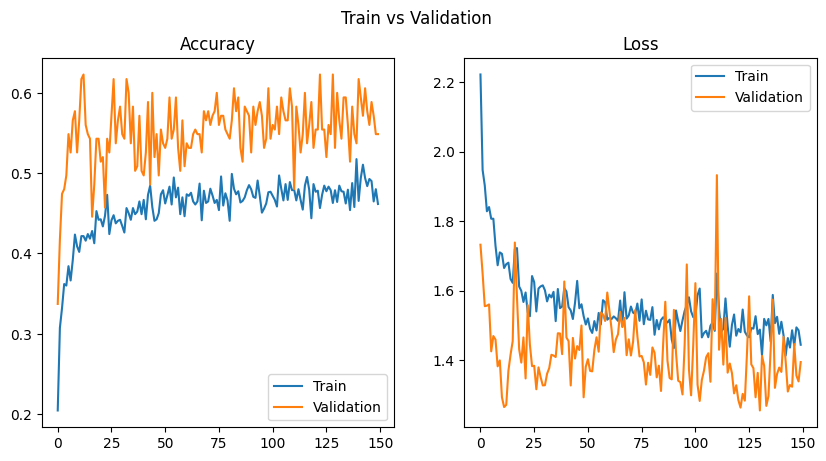

In [106]:
plot_graph(augmented_model_history)

### วิเคราะห์กราฟ

แต่เรายังใช้เทคนิคต่างๆ ในการปรับปรุงได้อีก โดยหากปรับปรุงให้ดีแล้ว น่าจะได้กราฟประมาณนี้ในกรณีที่เทรน มากกว่า 150 epoches

<div>
<br>
<img src="https://github.com/khthana/AI_resource/blob/main/thainum_final.JPG?raw=true" width="900"/><div>
<br>


### การประเมิน model โดยใช้ confusion matrix

ในการประเมิน model จะมีอยู่ด้วยกันหลายวิธีการ วิธีการหนึ่งเรียกว่า confusion matrix ซึ่งมักจะใช้กับงานที่เป็น Classification วิธีการ คือ นำผลการทำนาย กับ label หรือข้อมูลจริงทุกข้อมูล มา plot เป็น matrix ซึ่งข้อมูลที่ทำนายได้ถูกจะอยู่ตรงเส้นทะแยงมุม และจะทำให้เห็นว่าข้อมูลที่ผิด มักจะผิดที่ตัวใดบ้าง ซึ่งอาจจะนำข้อมูลนี้มาปรับปรุงโมเดลต่อไป

นอกเหนือจากการใช้ confusion matrix ก็จะมีการประเมินต่างๆ ที่ควรจะรู้จักดังนี้
- Precision (ความแม่นยำ): เปอร์เซ็นต์ของตัวอย่างที่ทำนายว่าเป็นบวกที่เป็นบวกจริง คำนวณจาก True Positives / (True Positives+False Positives)
- Recall (ความครอบคลุม): เปอร์เซ็นต์ของตัวอย่างบวกที่ถูกทำนายถูกต้อง คำนวณจาก True Positives / (True Positives+False Negatives)
- F1-Score: ค่าคะแนนที่เป็น Harmonic Mean ระหว่าง Precision และ Recall คำนวณจาก 2 x (Precision×Recall​)/(Precision+Recall)

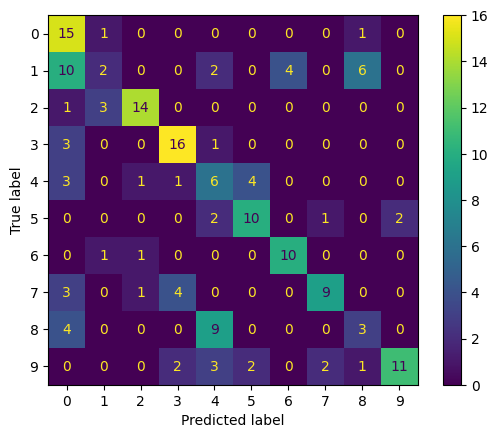

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Confusion matrix
cm = confusion_matrix(pred_df.label, pred_df.prediction, labels=range(10))
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
display.plot()
plt.show()

## การถอด parameter ออกมาแสดง

ในกรณีที่เราอยากรู้ว่าในแต่ละ neuron มีพารามิเตอร์อะไรบ้าง นอกเหนือจากการใช้คำสั่ง state_dict() แล้ว เรายังสามารถจะนำ model parameter ของ layer ที่ 1 (fc1) ของโมเดล DropoutThaiNumberNN3 มา plot เป็น image ขนาด 28x28 ได้ด้วย เนื่องจาก weight มีขนาด 28x28 อยู่แล้ว เพียงแต่ถูกยืดอยู่ เราก็เพียงแต่นำมาจัดเรียงเป็น 28x28 ก็สามารถนำมาแสดงเป็นภาพได้ ทำให้เราสามารถเห็นข้อมูลภายใน neuron ซี่งจะเรียกข้อมูลนี้ว่า feature

โดยเราจะต้องทำการ extract weights จาก layer fc1 แล้ว reshape weights นั้นให้เป็นขนาด 28x28 จากนั้นใช้ library เช่น matplotlib ในการ plot ภาพนี้

ในกรณีของ layer fc1 ในโมเดลนี้ เป็น fully connected layer (หรือ linear layer) ที่มี input size 28*28 = 784 ดังนั้น weights ของ fc1 จะมีขนาด (160, 784) ซึ่งหมายความว่าแต่ละ neuron ใน fc1 จะมี weight vector ที่ยาว 784 ดังนั้น เราสามารถเลือก neuron ใด neuron หนึ่งจาก fc1 แล้ว reshape weight vector ของมันให้เป็นขนาด 28x28 เพื่อ plot เป็นภาพ

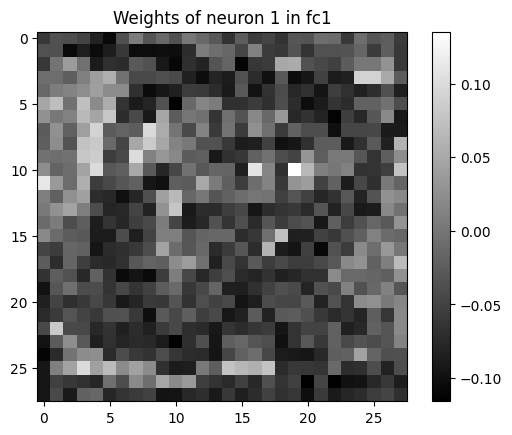

In [108]:
# Extract the weights of the first layer (fc1)
fc1_weights = augmented_model.fc1.weight.data

# Select the weights of the first neuron (or any neuron you want to visualize)
neuron_idx = 1  # Index of the neuron to visualize
weight_vector = fc1_weights[neuron_idx]

# Reshape the weight vector to 28x28
weight_image = weight_vector.view(28, 28).cpu().numpy()

# Plot the image
plt.imshow(weight_image, cmap='gray')
plt.title(f'Weights of neuron {neuron_idx} in fc1')
plt.colorbar()
plt.show()

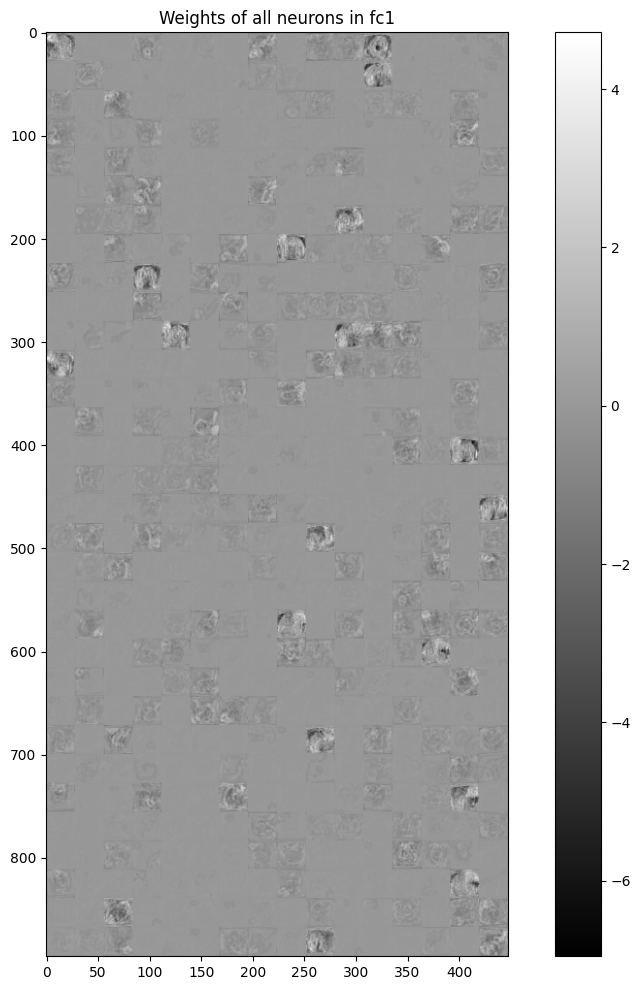

In [109]:
# Extract the weights of the first layer (fc1)
fc1_weights = augmented_model.fc1.weight.data

# Number of neurons in fc1
num_neurons = fc1_weights.shape[0]

# Prepare a grid to store all images
# grid_height = 10
grid_height = int(np.ceil(num_neurons / 16))
grid_width = 16
image_height = 28
image_width = 28

# Create an empty array to hold the grid image
grid_image = np.zeros((grid_height * image_height, grid_width * image_width))

# Fill the grid with the weight images
for i in range(num_neurons):
    weight_vector = fc1_weights[i]
    weight_image = weight_vector.view(image_height, image_width).cpu().numpy()

    row = i // grid_width
    col = i % grid_width

    grid_image[row * image_height: (row + 1) * image_height,
               col * image_width: (col + 1) * image_width] = weight_image

# Plot the grid image
plt.figure(figsize=(12, 12))
plt.imshow(grid_image, cmap='gray')
plt.title('Weights of all neurons in fc1')
plt.colorbar()
plt.show()

รูปด้านบนอาจจะดูไม่ค่อยรู้เรื่อง เพราะข้อมูลเป็นตัวเลข และ การทำงานไม่ใช่ Convolution แต่ในบางงานที่เป็นรูปภาพ รูปของ feature map สามารถบอกสิ่งที่เกิดขึ้นในการทำงานของ Neural Network ได้

<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*LlRAQHT0ktl_33VUnDhoIg.png">

<img src="https://miro.medium.com/v2/resize:fit:4426/format:webp/1*_uk1cKXslKo1gDHOWzljXA.png">

# Save Model

เอาละ! มาถึงตรงนี้ เราก็มี model ไว้สำหรับใช้งานแล้ว เนื่องจากการ train model ค่อนข้างจะเสียเวลามาก ดังนั้นหากต้องทำทุกครั้งน่าจะไม่ดี จึงควรจะ save model เอาไว้เพื่อนำมาใช้งานภายหลัง

ในการ save model ก็คือ การ save state_dict นั่นเอง

In [110]:
augmented_model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[-0.6111, -0.3029, -0.2767,  ..., -0.2968, -0.4803, -0.6203],
                      [-0.0607, -0.0345, -0.0398,  ..., -0.0557, -0.0488, -0.0694],
                      [-0.0552, -0.0710, -0.0647,  ..., -0.0868, -0.0368, -0.0576],
                      ...,
                      [-0.3867, -0.4613, -0.4326,  ..., -0.2546, -0.1364, -0.2824],
                      [-0.0800, -0.0771, -0.0556,  ..., -0.0598, -0.0677, -0.0285],
                      [-0.6040, -0.6541, -0.5204,  ..., -0.3727, -0.5615, -0.6816]])),
             ('fc1.bias',
              tensor([-0.9088, -0.0229, -0.0783, -0.5002, -0.0638, -0.0612, -0.0411, -0.9397,
                      -0.0642, -1.0277, -0.8146,  1.6275, -0.2989, -0.0670, -0.4470, -0.7655,
                      -0.0866, -0.5445, -0.0519, -0.1146, -0.0590, -0.0797, -0.3465, -0.3142,
                      -0.1459, -0.0710, -0.0711,  0.2278, -0.0649, -0.0361, -0.0878, -0.3780,
                      -0.6090, -0.04

In [111]:
augmented_model.state_dict()["fc1.weight"].shape, augmented_model.state_dict()["fc1.bias"].shape


(torch.Size([512, 784]), torch.Size([512]))

In [112]:
save_path = "thai_digit.pth"
torch.save(augmented_model.state_dict(), save_path)

จากนั้นก็ต้อง download มาเก็บไว้ มิฉะนั้น google colab จะลบข้อมูลออกหมด

# Load Model

เมื่อต้องการนำ Model ที่ save เก็บไว้มาใช้อีกครั้ง ให้ทำขั้นตอนเหมือนกับที่ผ่านมา ยกเว้นไม่ต้อง train แต่โหลดข้อมูลจากไฟล์เข้าสู่ model ได้เลย




In [113]:
loaded_model = DropoutThaiNumberNN3()
loaded_model.load_state_dict(torch.load("thai_digit.pth"))

<All keys matched successfully>

# สรุป

ในบทเรียนนี้เราได้เรียนการนำ Pytorch มาใช้งาน โดยเน้นที่ Classification และกล่าวถึงการทำงานของ Logistic Regression, Softmax และ Cross Entropy Loss ซึ่งใช้ในกระบวนการ Classification นอกจากนั้นยังได้กล่างถึงเรื่องของ Optimization การเกิด Overfitting และแนวทางการแก้ไข ตลอดจนการประเมินผลโมเดล การ save และ load โมเดล ซึ่งเป็นพื้นฐานของ deep learning ต่อไป



# Homework

1.) ทำการออกแบบปรับเปลี่ยนโมเดลล่าสุดใน DropoutThaiNumberNN3\
    - ปรับใช้จำนวนรอบการฝึก epoch ที่ 150\
    - ปรับจำนวน Hidden Layer ใหม่ (xx) *หมายเหตุ: จำนวนโหนดไม่ควรเกิน 1024 เพราะจะทำให้โมเดลขนาดใหญ่จนไม่สามารถอัพโหลดส่งพร้อมไฟล์งานได้*\
    - ปรับจำนวนการทำ Dropout ใหม่ nn.Dropout(x) ในช่วง [0.2-0.4]\
    - ทดลองปรับใช้ Softmax activation function (F.softmax(x)) ที่ output สุดท้าย
```
class DropoutThaiNumberNN3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, xxx)      <<<<
        self.fc2 = nn.Linear(xx, xx)    <<<<
        self.fc3 = nn.Linear(xx, 10)    <<<<
        self.dropout = nn.Dropout(x)    <<<<

    def forward(self, x):
        .
        .
        .
        x = F.softmax(x)    <<<<
        return x
```

2.) ใน augmentation หลังจากผ่านการฝึกฝนโมเดลในข้อ 1.\
<2.1> ใช้ epoch = 150 และยังคงใช้ SGD optimizer\
<2.2> ใช้ epoch = 150 เช่นกันแต่ปรับไปใช้ Adam optimizer แทน
```
# Let's train the model with augmented data
n_epochs = 150
augmented_model = DropoutThaiNumberNN3().to(device)  # Initialize the model
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(augmented_model.parameters(), lr=0.01)

augmented_model, augmented_model_history = train(
    augmented_model, n_epochs, loss_fn, optimizer, train_dataloader, validation_dataloader
)
```

สังเกตการณ์จากทั้งหมดและบันทึกผลพร้อมทั้งกราฟแสดงผลความแม่นยำและความสูญเสีย (accuracy/loss) จัดทำส่งเป็นไฟล์ PDF และ บันทึกโมเดลที่ทำการ save model จากข้อ 2.2 ผ่านฟังก์ชั่น torch.save(...) ที่มีให้ส่งพร้อมกับไฟล์งาน PDF